<a href="https://colab.research.google.com/github/Gauri-dsml23/30lm32-ml-time-series-analysis-on-sales-data/blob/master/Airbnb_new_user_bookings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
!gdown 1LhRSnImdRQNQJb-FYNbj8PKRQoxiSgeF
!gdown 1OnAoRjrd6MnEmfSSawvKRc0q4fFQXeeU
!gdown 1lCckrHM6gki5pILgazgtOWC7vSp4RXeL
!gdown 1UTSBXr7_Di_COT77r9zgP08TjrQDL1GY
!gdown 1qwhuZIGhm5FowzxAgNhx2uJ1rI1Prvy2

Downloading...
From: https://drive.google.com/uc?id=1LhRSnImdRQNQJb-FYNbj8PKRQoxiSgeF
To: /content/train_users.csv
100% 24.9M/24.9M [00:00<00:00, 67.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OnAoRjrd6MnEmfSSawvKRc0q4fFQXeeU
To: /content/test_users.csv
100% 6.76M/6.76M [00:00<00:00, 18.7MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1lCckrHM6gki5pILgazgtOWC7vSp4RXeL
From (redirected): https://drive.google.com/uc?id=1lCckrHM6gki5pILgazgtOWC7vSp4RXeL&confirm=t&uuid=3f3ac4e1-c9b6-4ba0-964d-86dcbd6469e7
To: /content/sessions.csv
100% 632M/632M [00:07<00:00, 86.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1UTSBXr7_Di_COT77r9zgP08TjrQDL1GY
To: /content/age_gender_bkts.csv
100% 11.9k/11.9k [00:00<00:00, 41.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qwhuZIGhm5FowzxAgNhx2uJ1rI1Prvy2
To: /content/countries.csv
100% 632/632 [00:00<00:00, 3.54MB/s]


In [3]:
train_df=pd.read_csv("train_users.csv")
test_df=pd.read_csv("test_users.csv")
session_df=pd.read_csv("sessions.csv")
age_df=pd.read_csv("age_gender_bkts.csv")
country_df=pd.read_csv("countries.csv")
test_df=pd.read_csv("test_users.csv")

## High level overview of the dataset

#### Inspect the first few rows of each dataset

In [4]:
train_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [5]:
session_df.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [6]:
age_df.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [7]:
country_df.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


In [8]:
test_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


#### Get basic info of each dataset

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

**Insight:**
- date_account_created should be of type date time
- date_first_booking should be of type date time
- Age should be of type int
- Rest we can see few missing values in the dataset we'll analyze them seperately

In [10]:
train_df['date_account_created']= train_df['date_account_created'].apply(pd.to_datetime)
train_df['date_first_booking']= train_df['date_first_booking'].apply(pd.to_datetime)
train_df['age']= train_df['age'].astype('Int64')

In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       62096 non-null  object 
 1   date_account_created     62096 non-null  object 
 2   timestamp_first_active   62096 non-null  int64  
 3   date_first_booking       0 non-null      float64
 4   gender                   62096 non-null  object 
 5   age                      33220 non-null  float64
 6   signup_method            62096 non-null  object 
 7   signup_flow              62096 non-null  int64  
 8   language                 62096 non-null  object 
 9   affiliate_channel        62096 non-null  object 
 10  affiliate_provider       62096 non-null  object 
 11  first_affiliate_tracked  62076 non-null  object 
 12  signup_app               62096 non-null  object 
 13  first_device_type        62096 non-null  object 
 14  first_browser         

Same insight as we had for the train dataset

In [12]:
session_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   action         object 
 2   action_type    object 
 3   action_detail  object 
 4   device_type    object 
 5   secs_elapsed   float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [13]:
session_df.shape

(10567737, 6)

Datatypes are assigned correctly no changes requried

In [14]:
age_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_bucket               420 non-null    object 
 1   country_destination      420 non-null    object 
 2   gender                   420 non-null    object 
 3   population_in_thousands  420 non-null    float64
 4   year                     420 non-null    float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB


**Insight:**
- We can convert year to int data type rest everything is perfect

In [15]:
age_df['year']=age_df['year'].astype('int64')

In [16]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country_destination            10 non-null     object 
 1   lat_destination                10 non-null     float64
 2   lng_destination                10 non-null     float64
 3   distance_km                    10 non-null     float64
 4   destination_km2                10 non-null     float64
 5   destination_language           10 non-null     object 
 6   language_levenshtein_distance  10 non-null     float64
dtypes: float64(5), object(2)
memory usage: 692.0+ bytes


The datatypes are assigned properly

#### Checking for missing values

In [17]:
train_df.isnull().sum()

,0
id,0
date_account_created,0
timestamp_first_active,0
date_first_booking,124543
gender,0
age,87990
signup_method,0
signup_flow,0
language,0
affiliate_channel,0


**Insight**
- We can see that date_first_booking has too many null values which indicates that many users haven't made any booking so far.
- Same is the case with age there are many missing values we'll analyze this feature and then fill the missing value accordingly.

In [18]:
#Creating a new feature to reflect whether the user has made a booking or not
train_df['has_booked'] = train_df['date_first_booking'].notnull().astype(int)
train_df.drop(columns=['date_first_booking'], inplace=True)

In [19]:
#Filling missing values using a new category called as "untracked"
train_df['first_affiliate_tracked'].fillna('untracked', inplace=True)

In [20]:
session_df.isnull().sum()

,0
user_id,34496
action,79626
action_type,1126204
action_detail,1126204
device_type,0
secs_elapsed,136031


other than device_type column we can see that there are many nulls present in the dataset

In [21]:
age_df.isnull().sum()

,0
age_bucket,0
country_destination,0
gender,0
population_in_thousands,0
year,0


In [22]:
country_df.isnull().sum()

,0
country_destination,0
lat_destination,0
lng_destination,0
distance_km,0
destination_km2,0
destination_language,0
language_levenshtein_distance,0


There are no nulls present in the age_df and country_df datasets

## Summary statistics

In [23]:
train_df.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id,213451,213451,nw9fwlyb5f,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_account_created,213451,NaN,NaN,NaN,2013-06-25 09:05:01.103297792,2010-01-01 00:00:00,2012-12-26 00:00:00,2013-09-11 00:00:00,2014-03-06 00:00:00,2014-06-30 00:00:00,NaN
timestamp_first_active,213451.0,NaN,NaN,NaN,20130850417367.257812,20090319043255.0,20121225073327.5,20130911061308.0,20140306082494.0,20140630235824.0,9253717046.583824
gender,213451,4,-unknown-,95688,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,125461.0,<NA>,<NA>,<NA>,49.668335,1.0,28.0,34.0,43.0,2014.0,155.666612
signup_method,213451,3,basic,152897,NaN,NaN,NaN,NaN,NaN,NaN,NaN
signup_flow,213451.0,NaN,NaN,NaN,3.267387,0.0,0.0,0.0,0.0,25.0,7.637707
language,213451,25,en,206314,NaN,NaN,NaN,NaN,NaN,NaN,NaN
affiliate_channel,213451,8,direct,137727,NaN,NaN,NaN,NaN,NaN,NaN,NaN
affiliate_provider,213451,18,direct,137426,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Insights**
- There are 213451 unique users in the train dataset
- The most frequent gender type in the dataset is "unknown" we can replace it with NA
- The mean age of the users is roughly 50 years we can also see some outliers where the max age is 2014
- The most frequent signup method was basic type and in total we have 3 different sign up methods
- There are in total 25 unique langauges in the dataset with english being the most frequent one
- There are in total 8 unique affiliate channels of which direct is the most frequent one
- There are in total 18 unique affiliate providers of which direct is the most frequent one
- There are 4 unique sing up app of which web is the most frequent one
- There are in total 9 unique first device types of which Mac desktop is the most frequent used
- There are 52 unique first browsers in the dataset of which chrome is the most used
- And 12 country destinations of which NDF is the most common which means that many users haven't booked any trip.

In [24]:
session_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,10533241,135483,mxqbh3ykxl,2722,NaN,NaN,NaN,NaN,NaN,NaN,NaN
action,10488111,359,show,2768278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
action_type,9441533,10,view,3560902,NaN,NaN,NaN,NaN,NaN,NaN,NaN
action_detail,9441533,155,view_search_results,1776885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
device_type,10567737,14,Mac Desktop,3594286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
secs_elapsed,10431706.0,NaN,NaN,NaN,19405.810751,88884.243208,0.0,229.0,1147.0,8444.0,1799977.0


**Insights**
- There are 135483 unique users in the sessions dataset
- We have in total 359 unique actions taken by a user of which show is the most frequent action perfomred by the users.
- We have 10 unique action types of which view is the most frequent one

In [25]:
age_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age_bucket,420,21,100+,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_destination,420,10,AU,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,420,2,male,210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
population_in_thousands,420.0,NaN,NaN,NaN,1743.133333,2509.843202,0.0,396.5,1090.5,1968.0,11601.0
year,420.0,NaN,NaN,NaN,2015.0,0.0,2015.0,2015.0,2015.0,2015.0,2015.0


**Insight**
- we have in total 21 unique age buckets and if we analyze the dataset the bin size is 5
- The most frquent age bucket is 100+
- there are 10 unique country destination of which Australia is the most frequent one
- The data in this table consists for year 2015 only
- Most frequent gender is Male

In [26]:
country_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country_destination,10,10,AU,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat_destination,10.0,NaN,NaN,NaN,39.799398,24.739112,-26.853388,39.63909,44.053092,51.891219,62.393303
lng_destination,10.0,NaN,NaN,NaN,-4.262446,63.700585,-96.818146,-6.737559,-0.139014,9.163386,133.27516
distance_km,10.0,NaN,NaN,NaN,7181.8978,3941.141734,0.0,7001.5576,7603.63265,7842.357,15297.744
destination_km2,10.0,NaN,NaN,NaN,2973734.1,4329619.177089,41543.0,258042.5,431196.0,5966865.25,9984670.0
destination_language,10,7,eng,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_levenshtein_distance,10.0,NaN,NaN,NaN,50.499,44.54169,0.0,0.0,67.915,91.395,95.45


Now since we do not have a proper joining key for tables country_df and age_df we won't be using that and won't be further analyzing them and now we'll analyze the Train_df and sessions_df and pre-process them

## Train data EDA

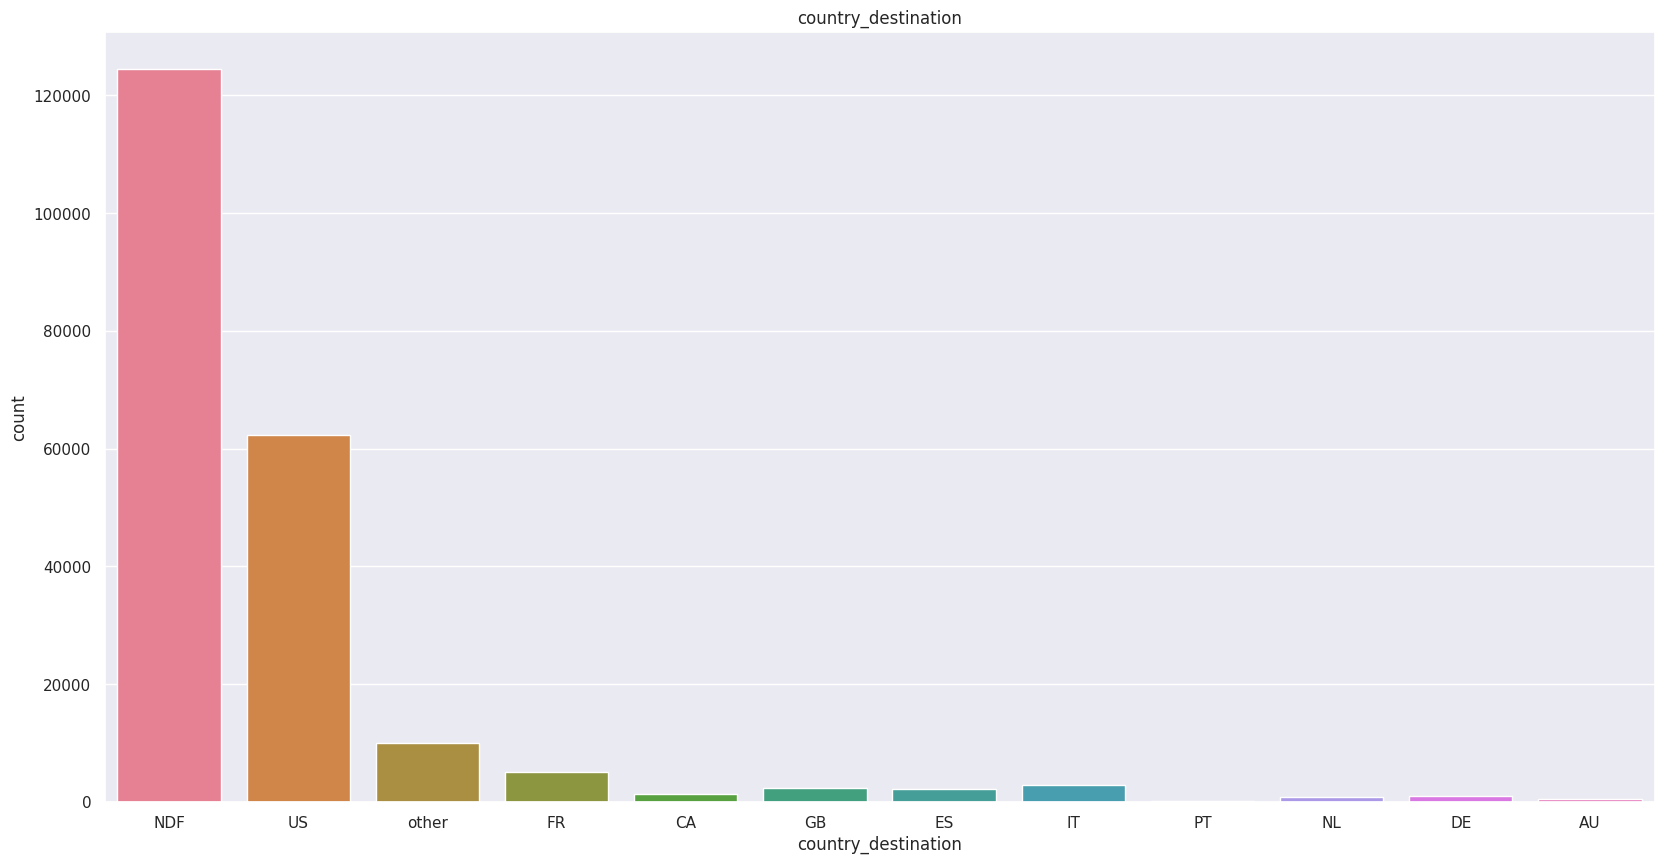

In [27]:
plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="country_destination", data=train_df,hue="country_destination")

plt.title("country_destination")

plt.show()

**Insights**
- The Dataset is highly Imbalanced.
- Majority of users didnt do any booking or travelled to the US only.

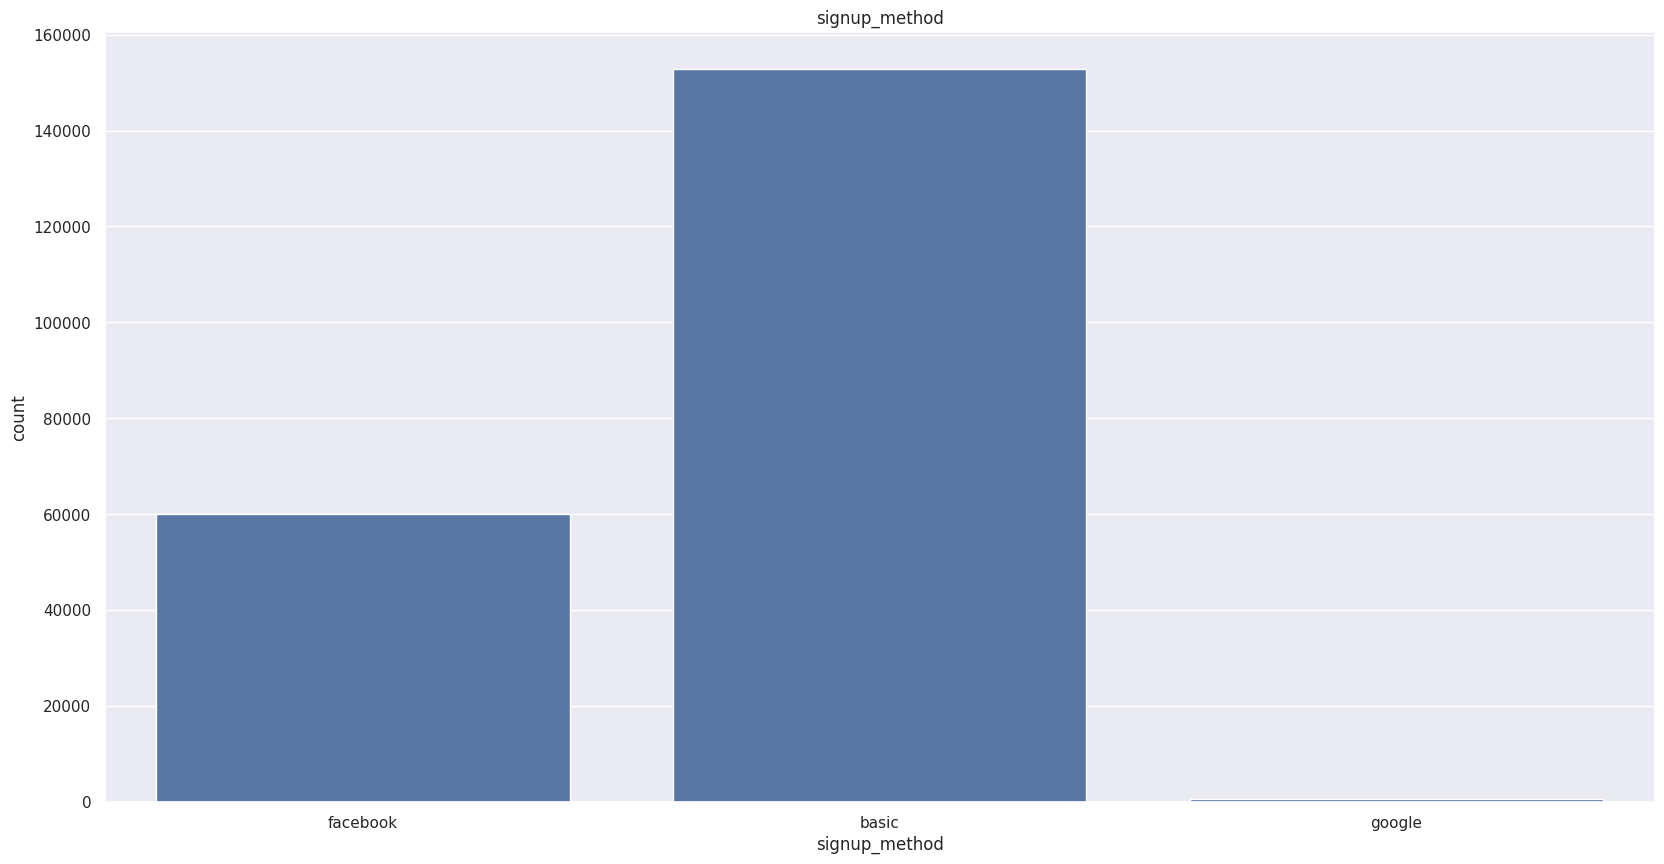

In [28]:
# signup_method share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="signup_method", data=train_df)

plt.title("signup_method")

plt.show()

**Insight**
- Majority of users either signup from basic or facebook.
- Basic's share is more than double of facebook.
- Googles's share is negligible.

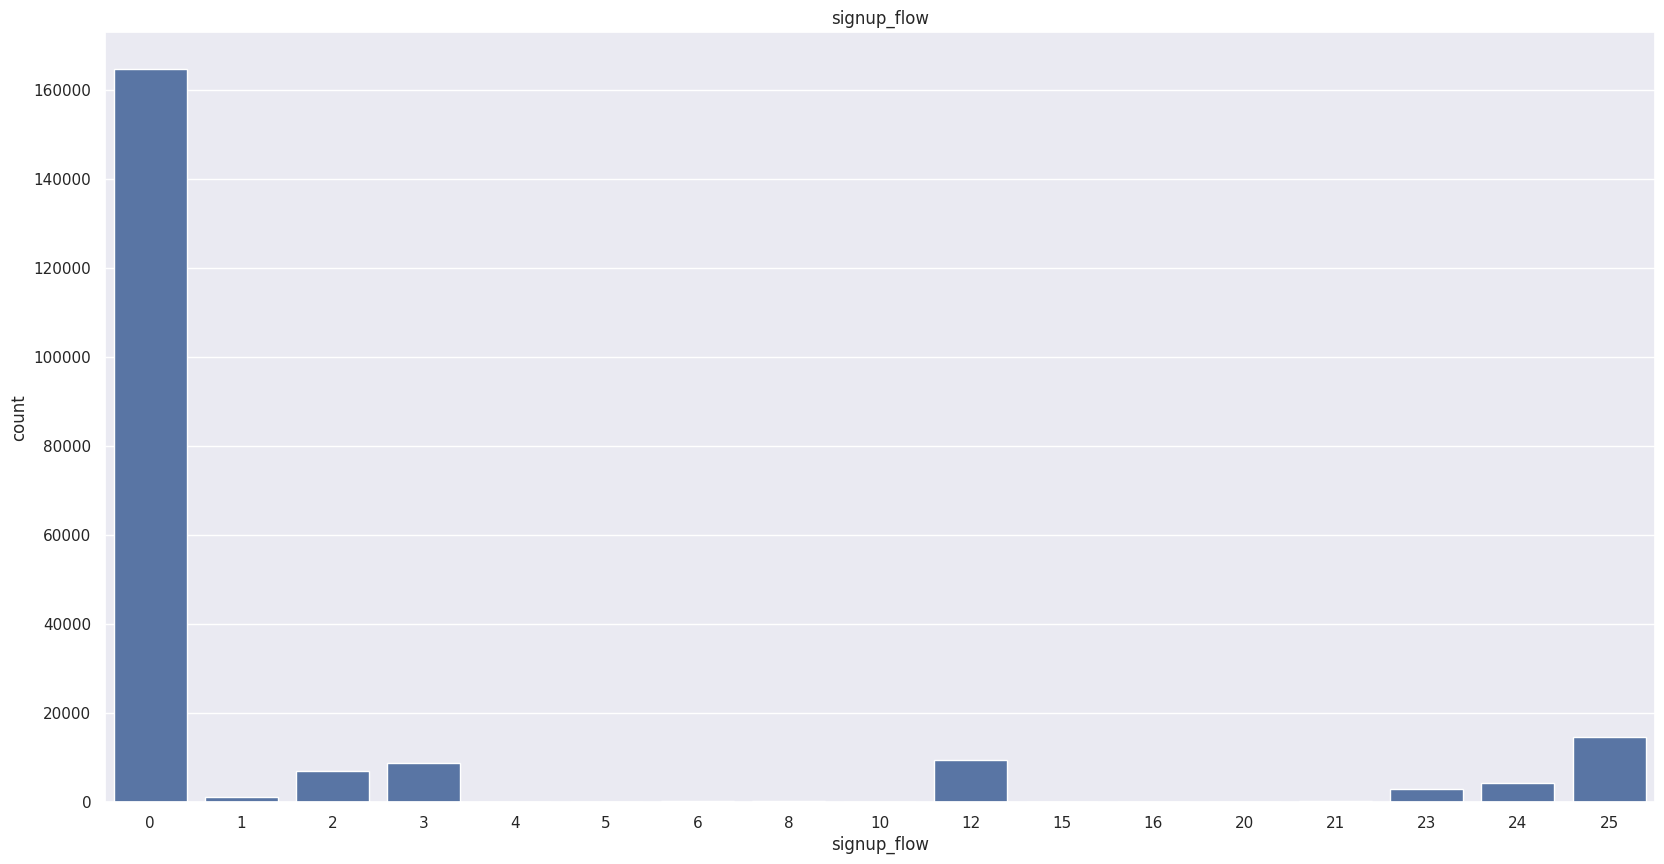

In [29]:
# signup_flow share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="signup_flow", data=train_df)

plt.title("signup_flow")

plt.show()

**Insight**
- Majority of users' signup flow is 0.
- Other than 1,2,3,12,23,24 and 25, all others have negligible share.

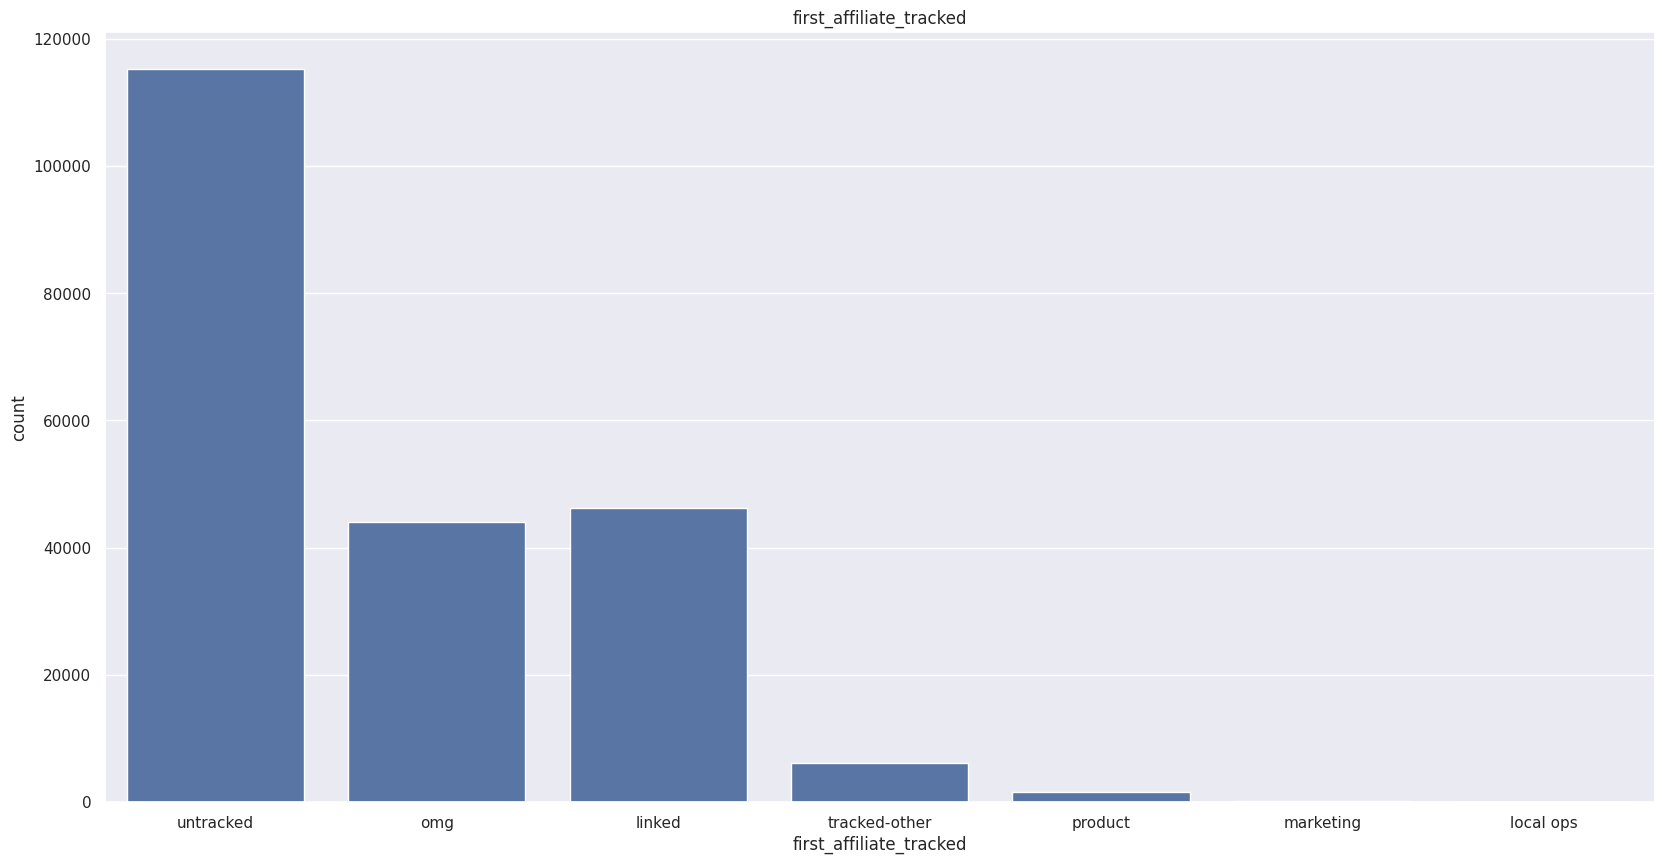

In [30]:
# first_affiliate_tracked share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="first_affiliate_tracked", data=train_df)

plt.title("first_affiliate_tracked")

plt.show()

**Insight**
- Majority of users' first affiliate tracked is 'untracked'.
- 'marketing' and 'local ops' have the lowest share.

In [31]:
train_df['gender'].value_counts()

,count
gender,
-unknown-,95688
FEMALE,63041
MALE,54440
OTHER,282


In [32]:
train_df.gender.replace('-unknown-',np.nan, inplace=True)

In [33]:
train_df['gender'].value_counts()

,count
gender,
FEMALE,63041
MALE,54440
OTHER,282


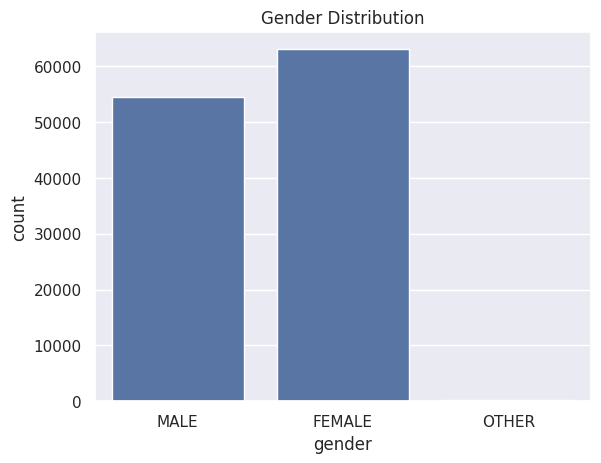

In [34]:
# Plot gender distribution
sns.countplot(x='gender', data=train_df)
plt.title('Gender Distribution')
plt.show()

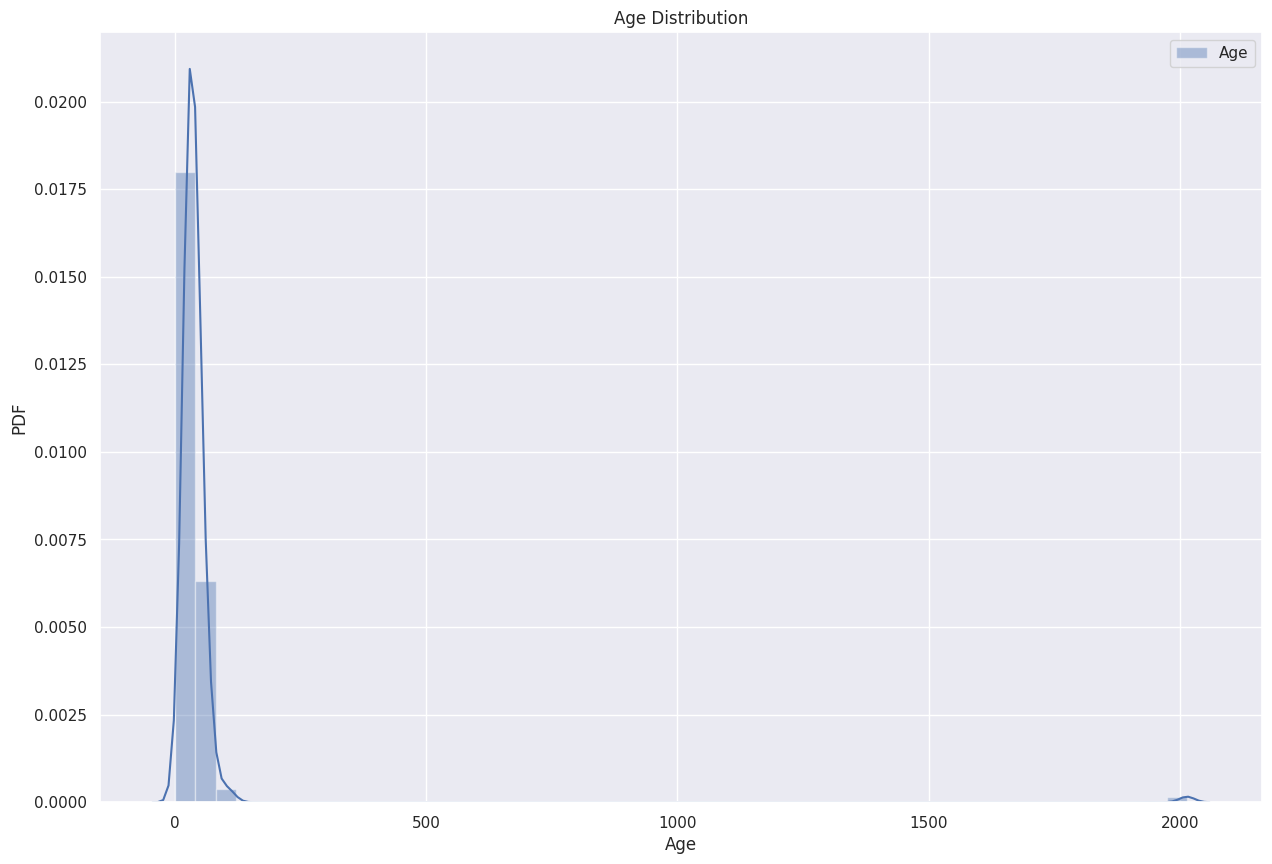

In [35]:
# Age distribution

plt.figure(figsize=(15,10))

ax = sns.distplot(train_df['age'].dropna(),label="Age")

ax.set_title('Age Distribution')

ax.set(xlabel='Age', ylabel='PDF')

plt.legend()

plt.show()

**Insight**
- There are many outliers.
- Some people have filled the year value as DOB.

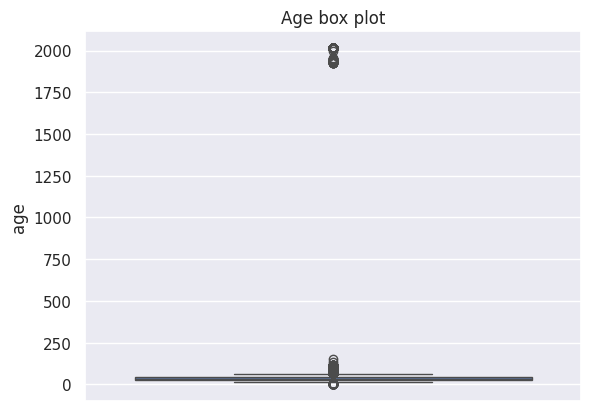

In [36]:
sns.boxplot(y='age',data=train_df)

plt.title("Age box plot")

plt.show()

The skewed box plot shows us the presence of outliers

In [37]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers

for i in range(0,110,10):

    print("{} percentile value is {}".format(i,np.percentile(train_df['age'].dropna(),i)))

0 percentile value is 1.0
10 percentile value is 25.0
20 percentile value is 27.0
30 percentile value is 29.0
40 percentile value is 32.0
50 percentile value is 34.0
60 percentile value is 36.0
70 percentile value is 40.0
80 percentile value is 46.0
90 percentile value is 56.0
100 percentile value is 2014.0


In [38]:
#calculating 90-100th percentile to find a the correct percentile value for removal of outliers

for i in range(90,101,1):

    print("{} percentile value is {}".format(i,np.percentile(train_df['age'].dropna(),i)))

90 percentile value is 56.0
91 percentile value is 57.0
92 percentile value is 58.0
93 percentile value is 60.0
94 percentile value is 62.0
95 percentile value is 64.0
96 percentile value is 67.0
97 percentile value is 71.0
98 percentile value is 93.0
99 percentile value is 105.0
100 percentile value is 2014.0


In [39]:
#calculating 0-10th percentile to find a the correct percentile value for removal of outliers

for i in range(0,11,1):

    print("{} percentile value is {}".format(i,np.percentile(train_df['age'].dropna(),i)))

0 percentile value is 1.0
1 percentile value is 19.0
2 percentile value is 21.0
3 percentile value is 22.0
4 percentile value is 22.0
5 percentile value is 23.0
6 percentile value is 23.0
7 percentile value is 24.0
8 percentile value is 24.0
9 percentile value is 25.0
10 percentile value is 25.0


In [40]:
# median replacement with median age = 34.0

def age_median(age):

    """
    Function to replace age outliers with median age

    parameters: age

    returns : age

    """

    if age < 15.0 or age > 100.0:

        return 34.0

    else:

        return age

In [41]:
# First, replace NA values with a placeholder (e.g., -1) so that when we use a logical operator it does not throw any error
train_df['age'] = train_df['age'].fillna(-1)

In [42]:
train_df['age'] = train_df['age'].apply(age_median)

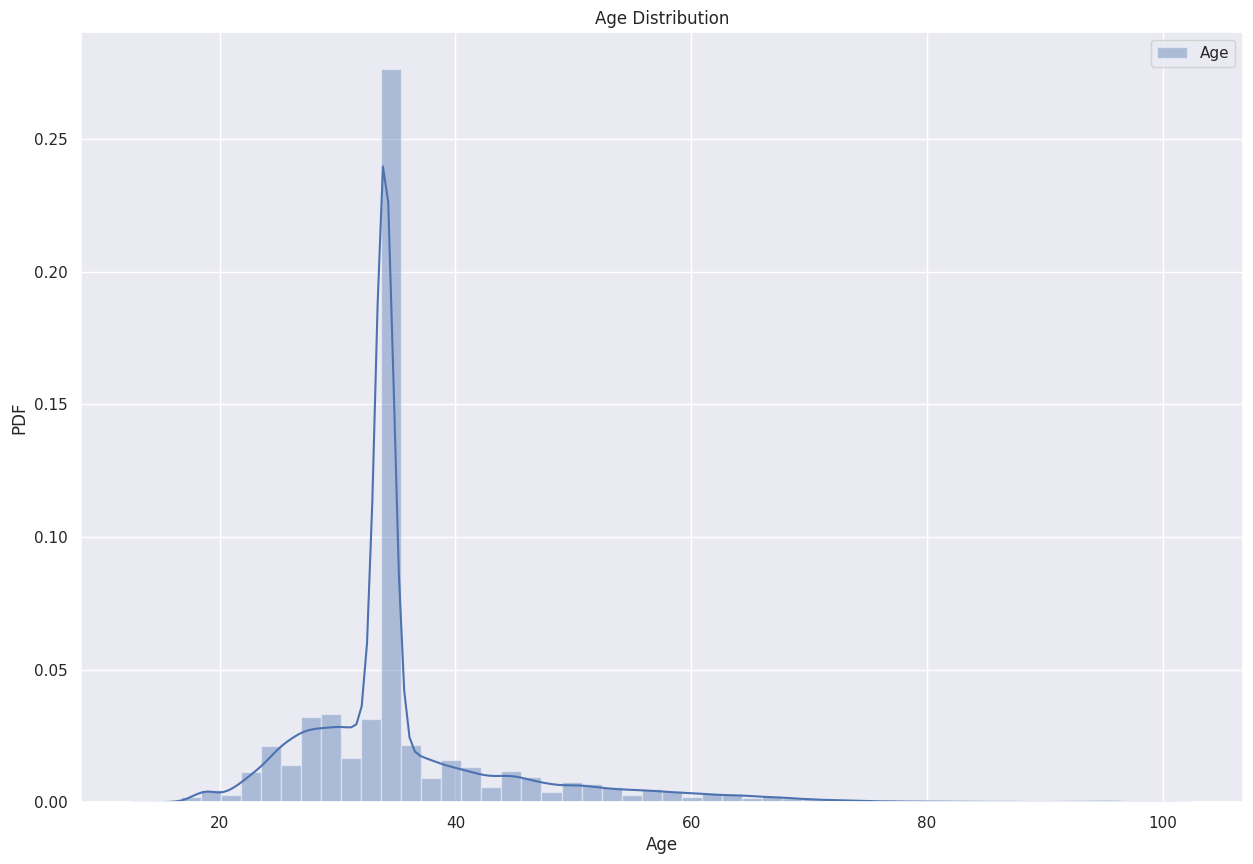

In [43]:
# Age distribution

plt.figure(figsize=(15,10))

ax = sns.distplot(train_df['age'].dropna(),label="Age")

ax.set_title('Age Distribution')

ax.set(xlabel='Age', ylabel='PDF')

plt.legend()

plt.show()

outliers removed , most ages concentrated bw 20-40 with median age = 34

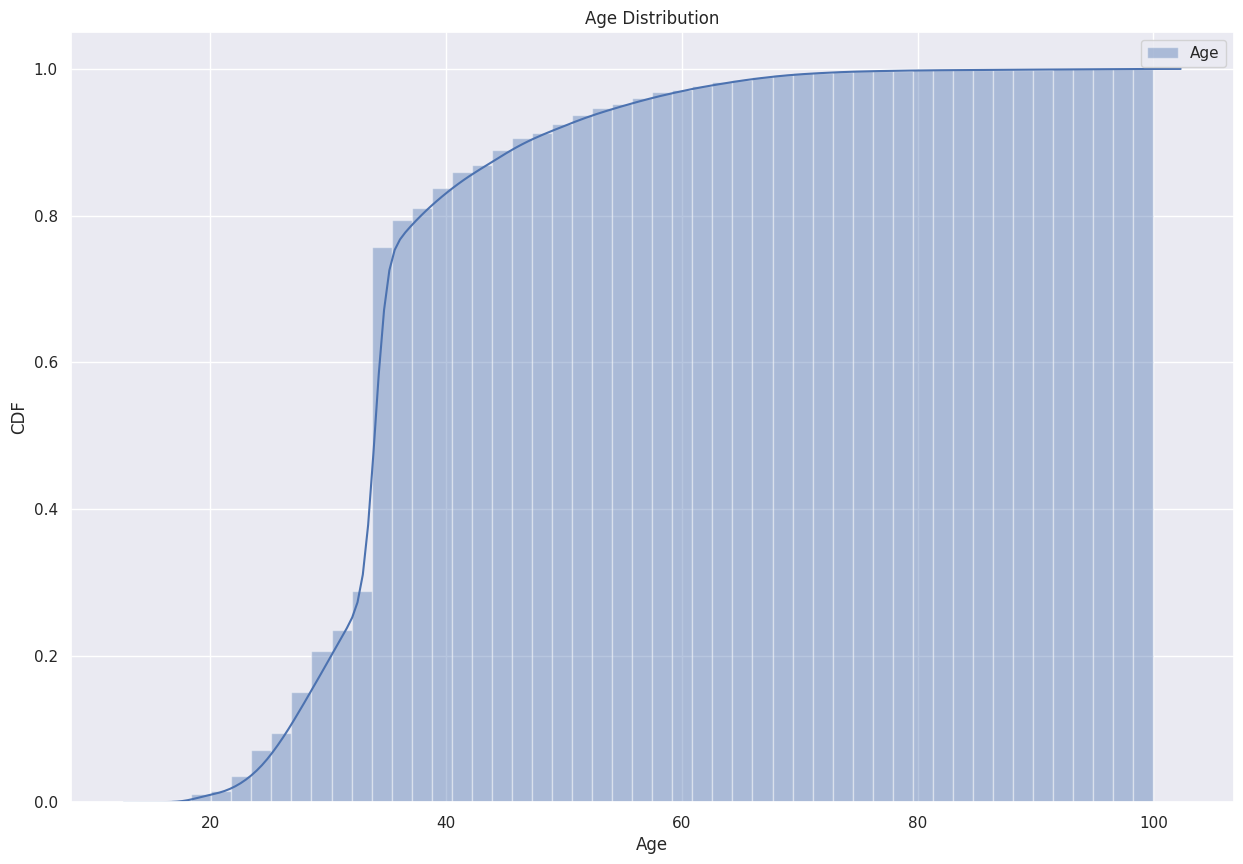

In [44]:
# Age distribution cdf

plt.figure(figsize=(15,10))

kwargs = {'cumulative': True}

ax = sns.distplot(train_df['age'].dropna(),label="Age", hist_kws=kwargs, kde_kws=kwargs)

ax.set_title('Age Distribution')

ax.set(xlabel='Age', ylabel='CDF')

plt.legend()

plt.show()

80% of the population has age less than 40.

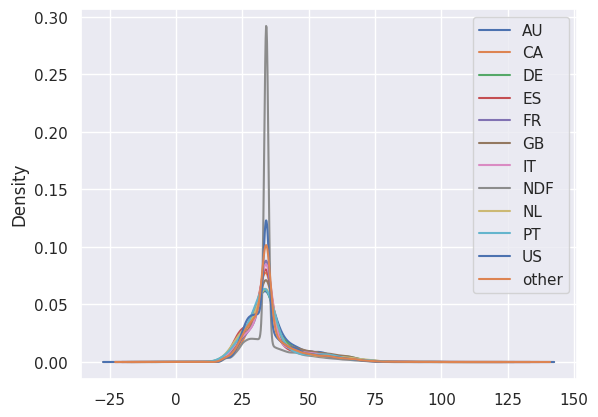

<Figure size 2000x1000 with 0 Axes>

In [45]:
train_df.groupby("country_destination").age.plot(kind='kde',legend=True)

plt.figure(figsize=(20,10))

plt.show()

**Insight:**
- We can see that there is not major difference in ages when it comes to the destination country.

In [46]:
train_df['date_account_created_day'] = train_df.date_account_created.dt.weekday

train_df['date_account_created_month'] = train_df.date_account_created.dt.month

train_df['date_account_created_year'] = train_df.date_account_created.dt.year

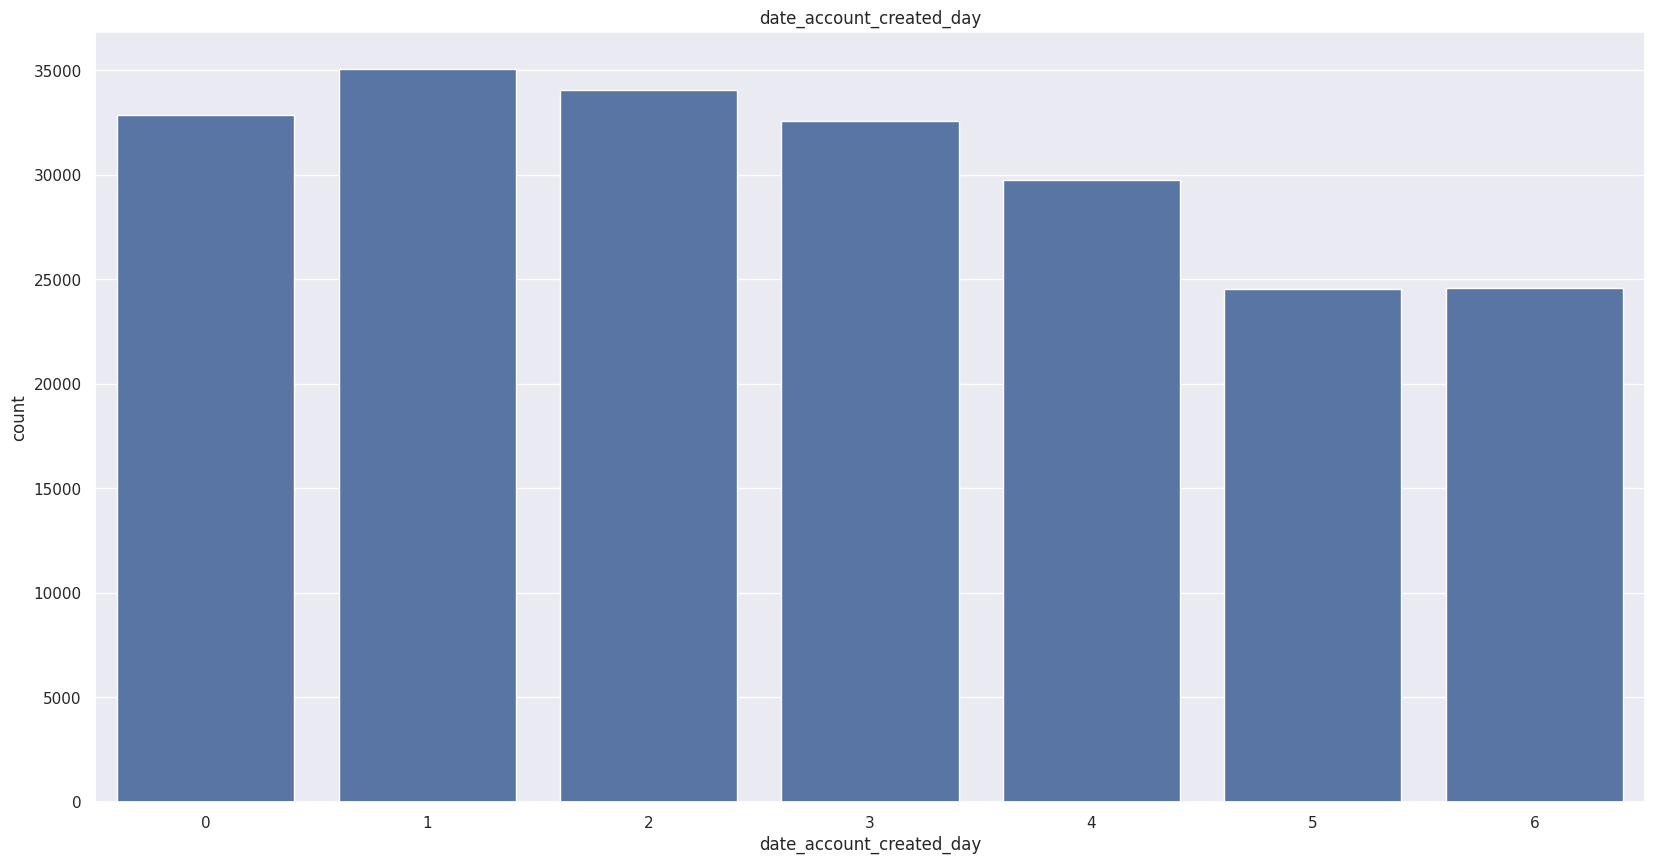

In [47]:
# date_account_created_day share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="date_account_created_day", data=train_df)

plt.title("date_account_created_day")

plt.show()

**Insight**
- Most accounts are created on tuesdays and wednesdays.
- Least number of accounts are created on saturdays and sundays.

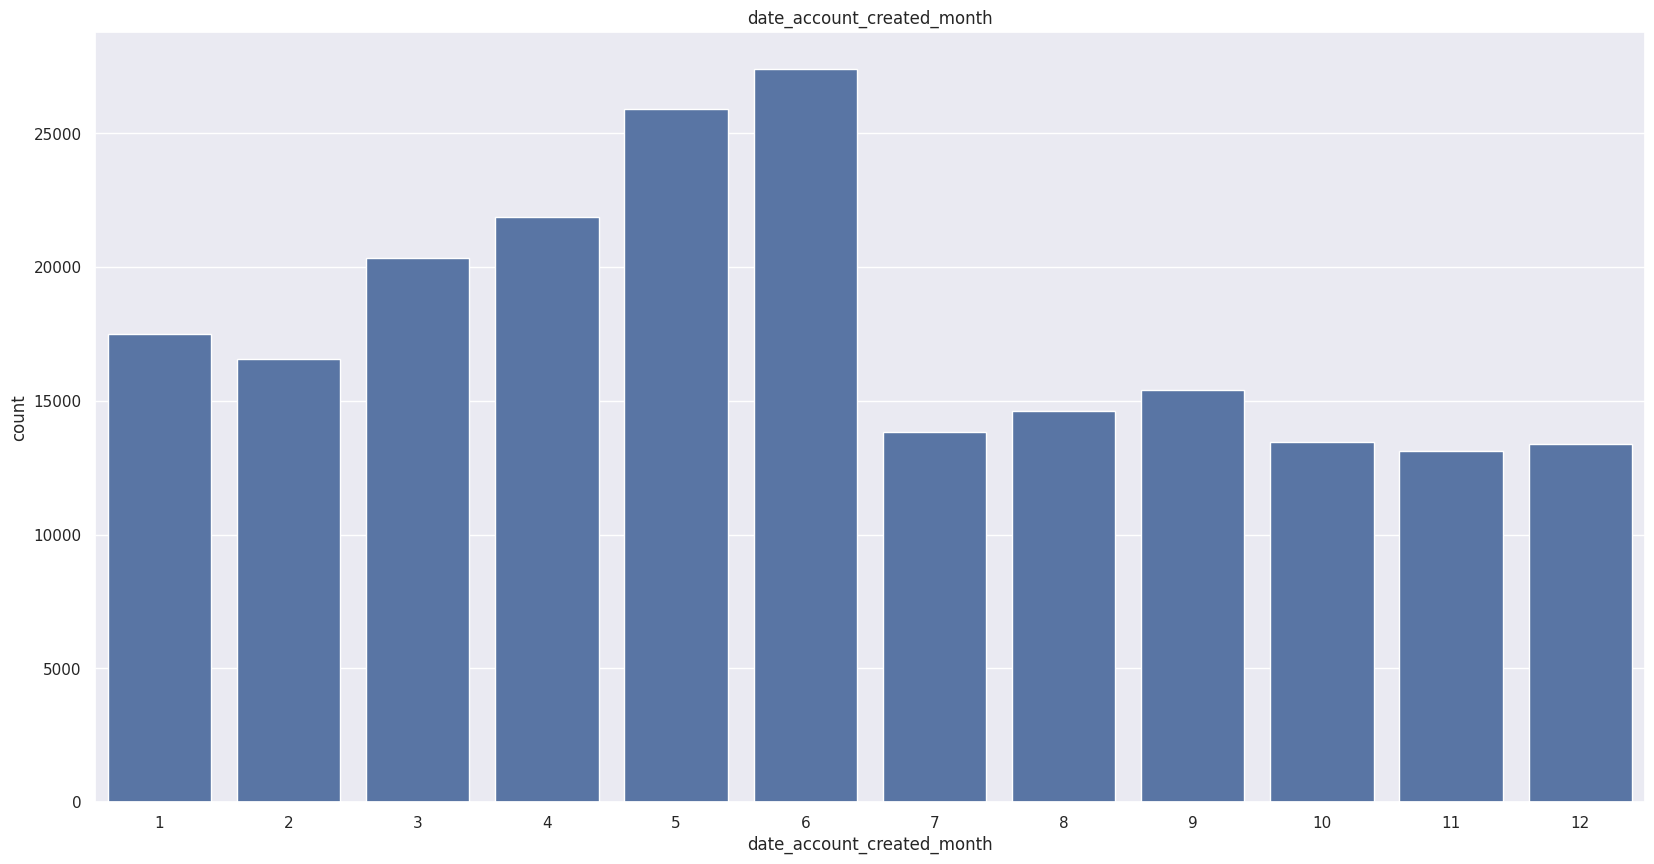

In [48]:
# date_account_created_day share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="date_account_created_month", data=train_df)

plt.title("date_account_created_month")

plt.show()

**Insight**
- Most accounts created in May and June.
- Least no of accounts are created in October,November and December.

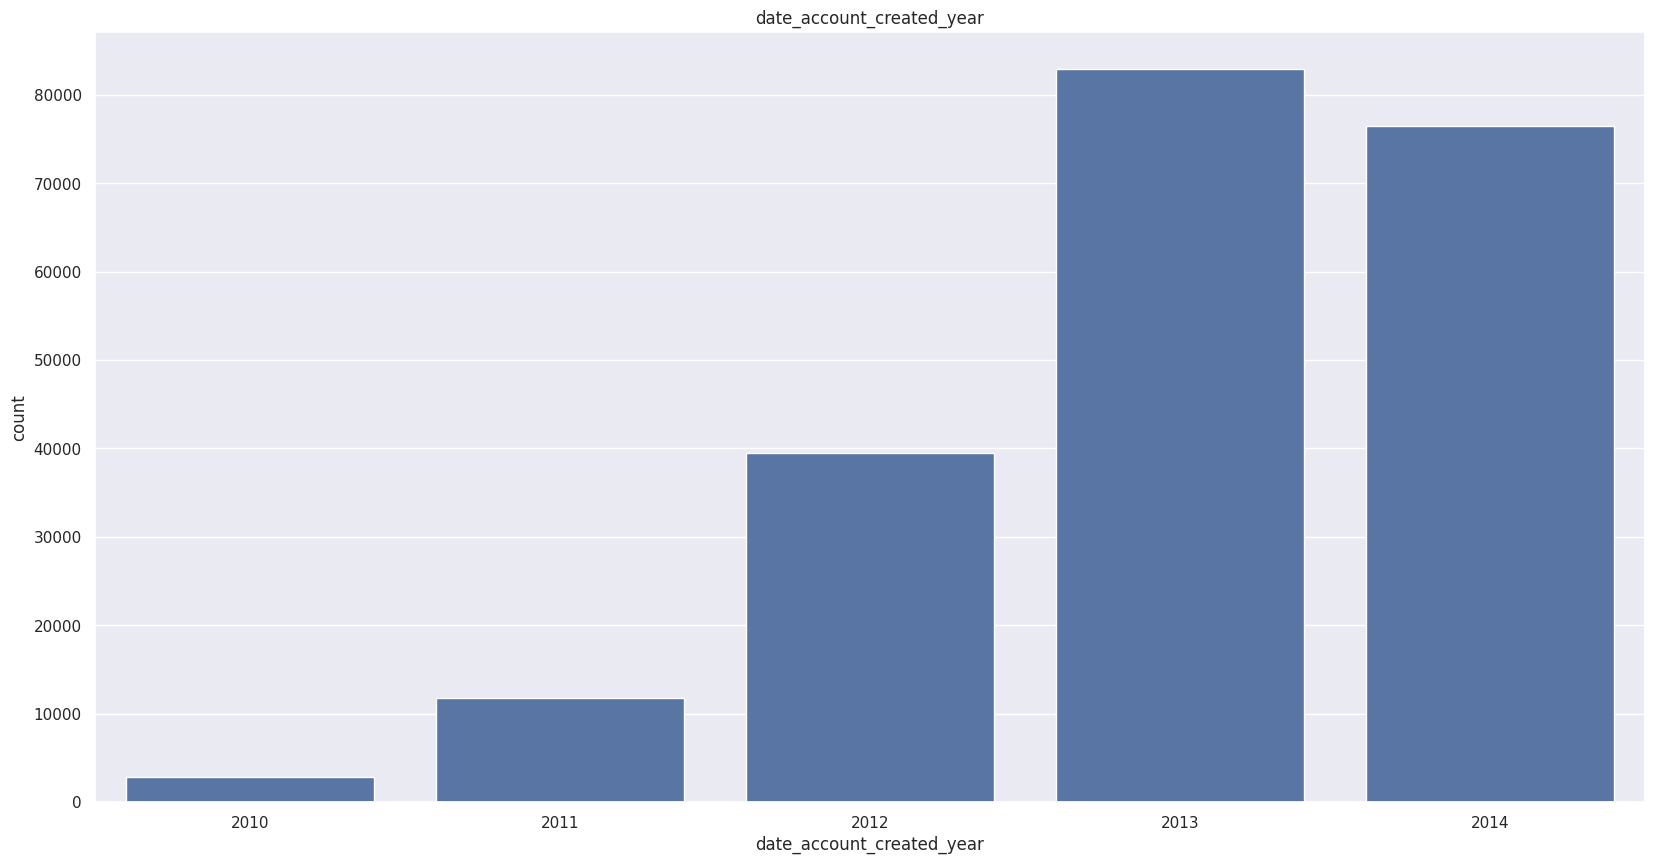

In [49]:
# date_account_created_day share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="date_account_created_year", data=train_df)

plt.title("date_account_created_year")

plt.show()

**Insight**
- Airbnb's popularity has increased exponentially from 2010 to 2014.
- Dip in 2014 indicates test data has been taken from 2014.

#### Bivariate analysis

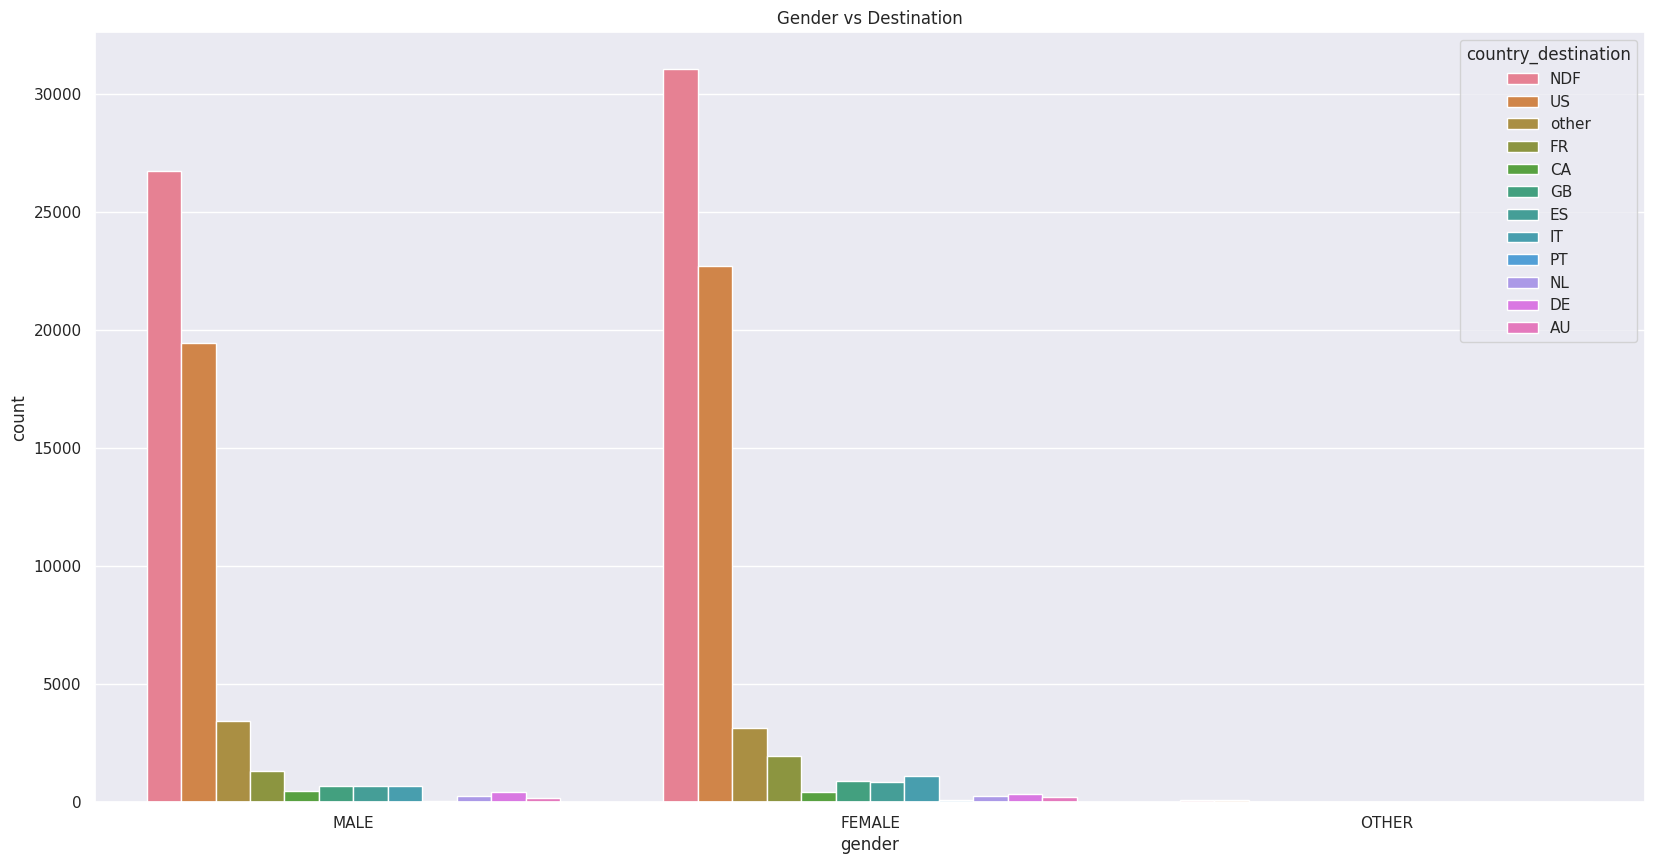

In [50]:
# gender share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="gender", hue="country_destination", data=train_df)

plt.title("Gender vs Destination")

plt.show()

**Insight**
- Majority of users travel to 'other' after NDF and US.
- France's share in female users is more than male users.

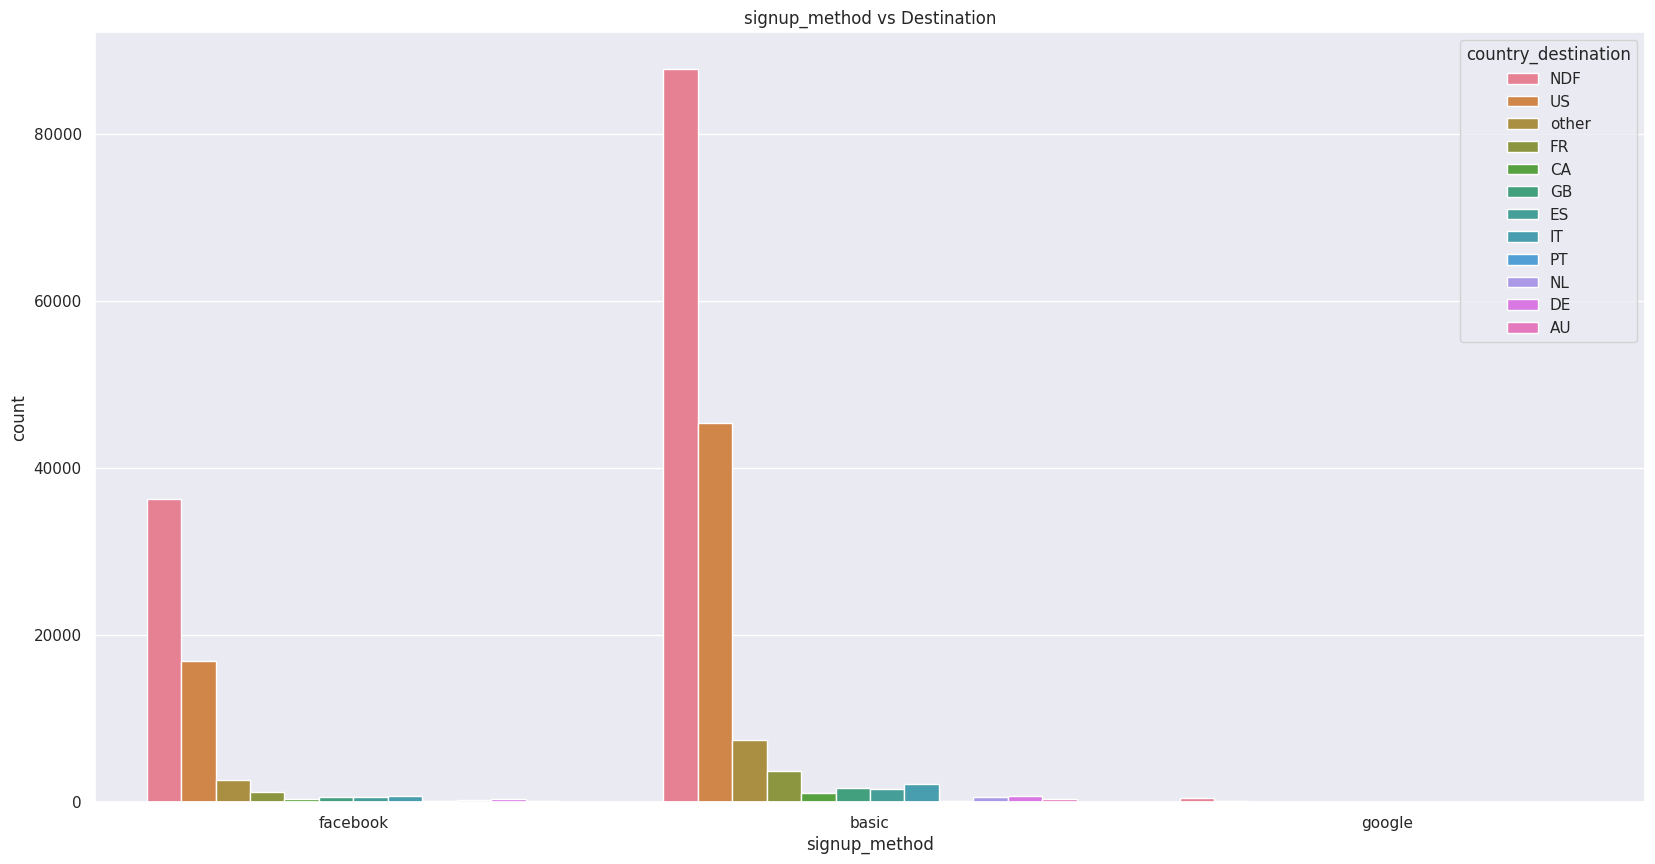

In [51]:
# signup_method share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="signup_method", hue="country_destination", data=train_df)

plt.title("signup_method vs Destination")

plt.show()

Negligible signups happening from google

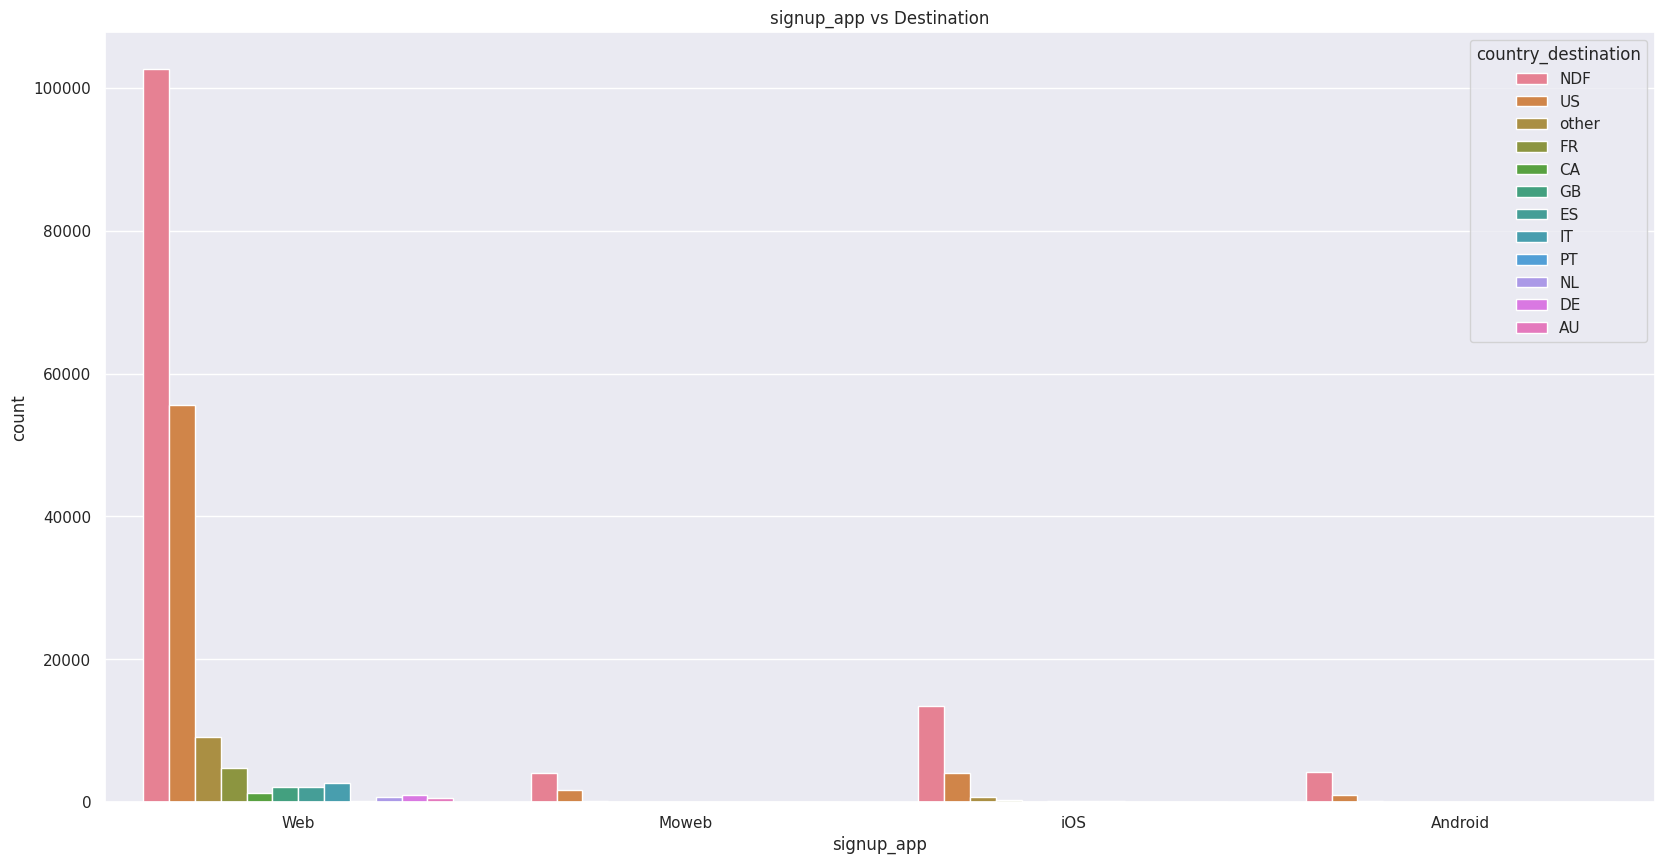

In [52]:
# signup_app share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="signup_app", hue="country_destination", data=train_df)

plt.title("signup_app vs Destination")

plt.show()

Least no of users use Android as compared to web,ios,Moweb

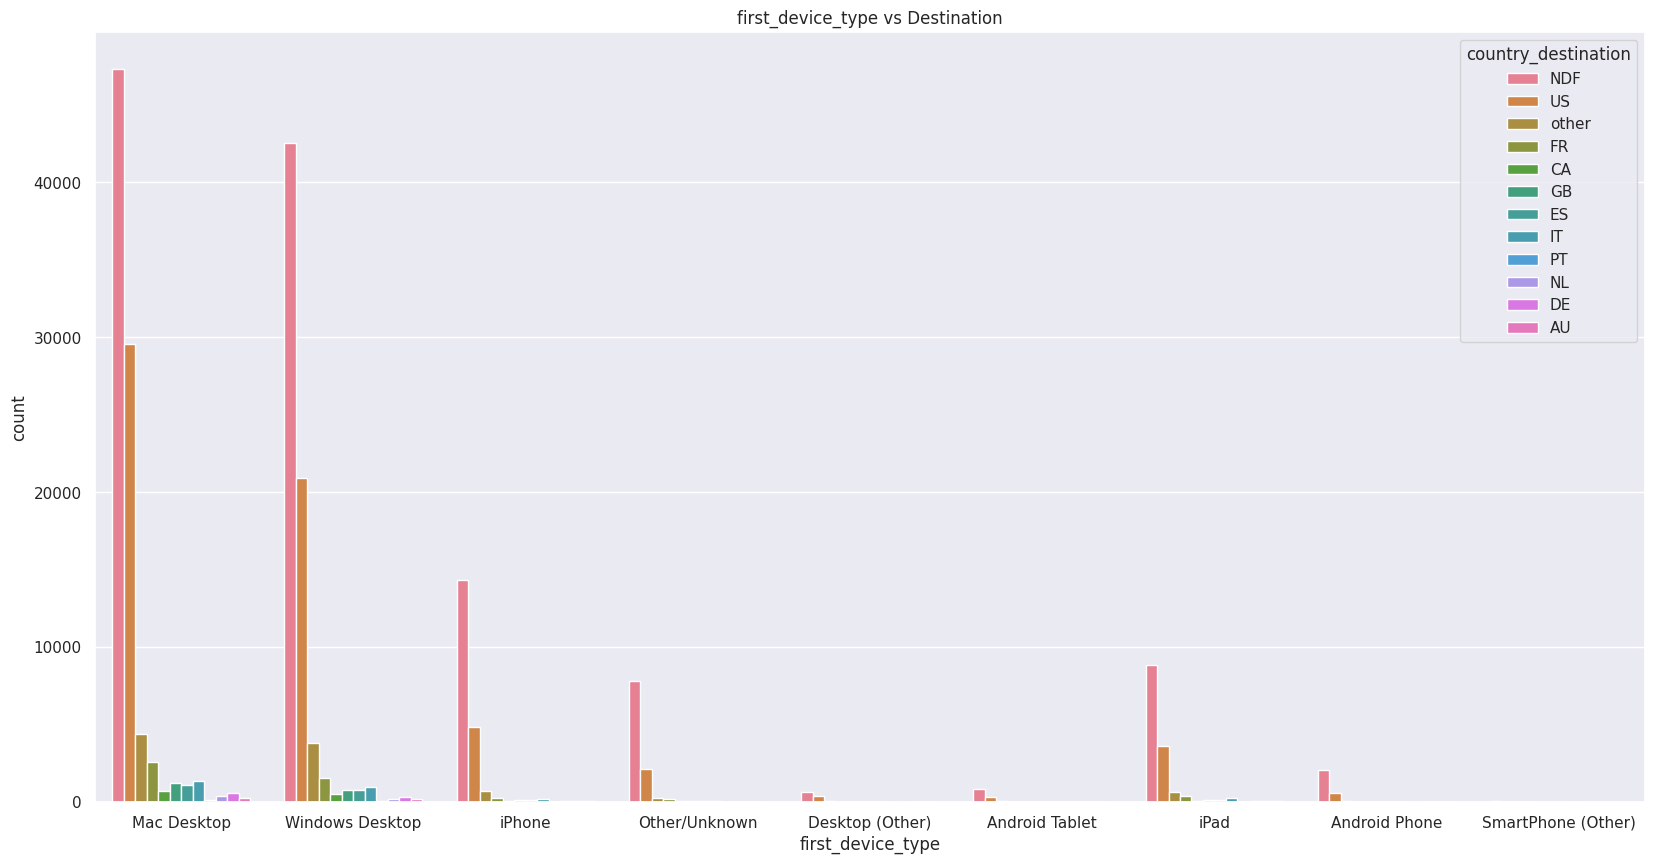

In [53]:
# first_device_type share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="first_device_type", hue="country_destination", data=train_df)

plt.title("first_device_type vs Destination")

plt.show()

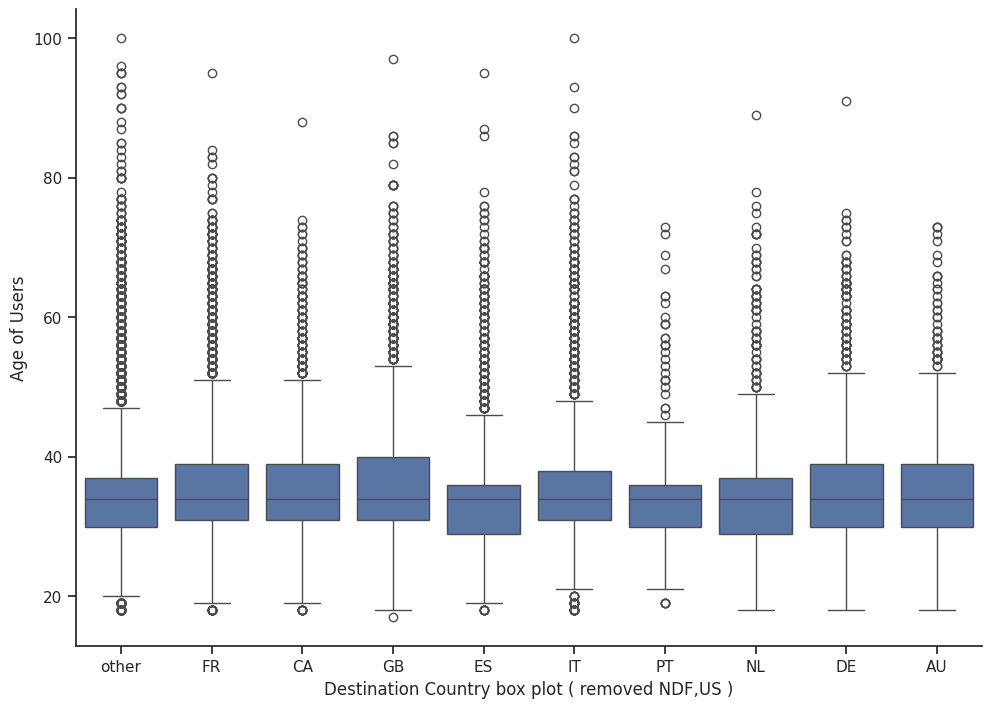

In [54]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
data_without_NDF = train_df[train_df['country_destination']!='US']
data_without_NDF1= data_without_NDF[data_without_NDF['country_destination']!='NDF']
sns.boxplot(y='age' , x='country_destination',data=data_without_NDF1)
plt.xlabel('Destination Country box plot ( removed NDF,US )')
plt.ylabel('Age of Users')
sns.despine()

**Insight**
- Users booking for countries Spain , Portugal and Netherlands tend to be younger where as Users booking for Great Britain tend to be older.

## Sessions data EDA

In [55]:
session_df.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [56]:
# Actions per user
actions_per_user = session_df['user_id'].value_counts()
print(actions_per_user.describe())

count    135483.000000
mean         77.745850
std         112.563746
min           1.000000
25%          16.000000
50%          41.000000
75%          95.000000
max        2722.000000
Name: count, dtype: float64


We can see that on an average a user performs roughly 78 different type of actions

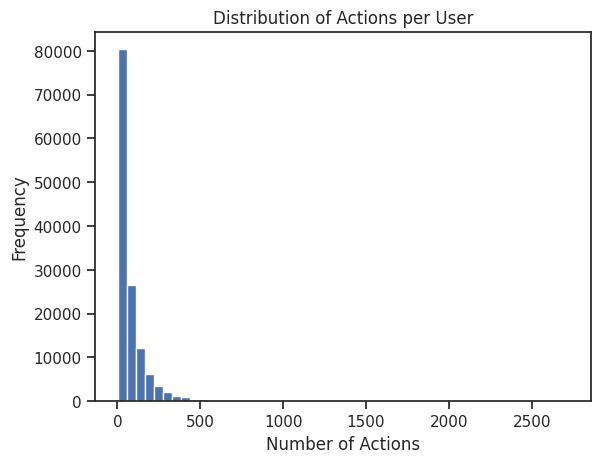

In [57]:
# Plot distribution of actions per user
actions_per_user.plot(kind='hist', bins=50, title='Distribution of Actions per User')
plt.xlabel('Number of Actions')
plt.ylabel('Frequency')
plt.show()

In [58]:
# Top actions
top_actions = session_df['action'].value_counts().head(10)
print(top_actions)

action
show                     2768278
index                     843699
search_results            725226
personalize               706824
search                    536057
ajax_refresh_subtotal     487744
update                    365130
similar_listings          364624
social_connections        339000
reviews                   320591
Name: count, dtype: int64


Show is the most performed action type by users

In [59]:
# Distribution of action types
action_types = session_df['action_type'].value_counts()
print(action_types)

action_type
view                3560902
data                2103770
click               1996183
-unknown-           1031170
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: count, dtype: int64


The most frequently performed action_type is view action this could be viewing the property

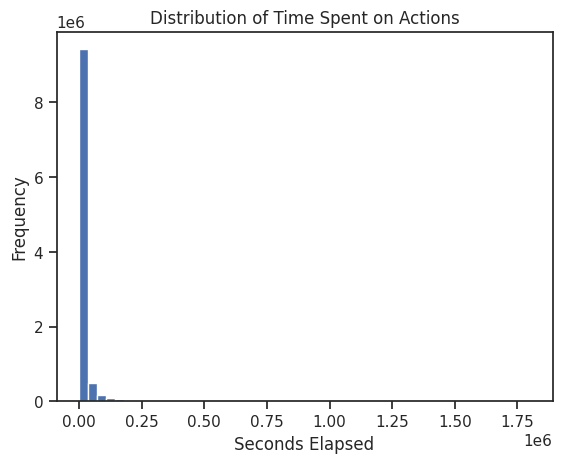

In [60]:
# Distribution of secs_elapsed
session_df['secs_elapsed'].plot(kind='hist', bins=50, title='Distribution of Time Spent on Actions')
plt.xlabel('Seconds Elapsed')
plt.ylabel('Frequency')
plt.show()

action_type
-unknown-            28790.921498
booking_request      49733.959194
booking_response     35626.500000
click                21431.909105
data                  7207.314674
message_post        117459.657195
modify               36444.363477
partner_callback     28656.822429
submit               40467.226650
view                 20534.717217
Name: secs_elapsed, dtype: float64


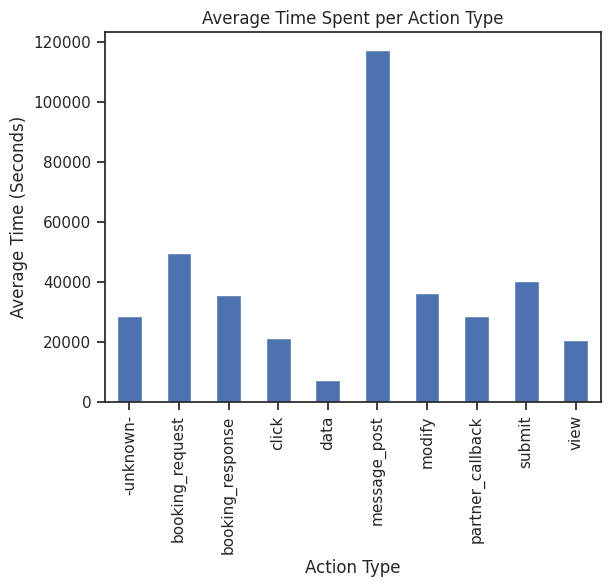

In [61]:
# Average time spent per action type
time_per_action_type = session_df.groupby('action_type')['secs_elapsed'].mean()
print(time_per_action_type)

# Plot average time spent per action type
time_per_action_type.plot(kind='bar', title='Average Time Spent per Action Type')
plt.xlabel('Action Type')
plt.ylabel('Average Time (Seconds)')
plt.show()

Users tend to spend more time on an average on message_post action type followed by booking_request action type

In [62]:
# Sequence of actions
user_actions = session_df.groupby('user_id')['action'].apply(list)

# Example: View the first few user action sequences
print(user_actions.head())

user_id
00023iyk9l    [index, dashboard, header_userpic, dashboard, ...
0010k6l0om    [search_results, show, personalize, show, sear...
001wyh0pz8    [search, search, search, show, social_connecti...
0028jgx1x1    [show, reviews, show, search, show, search, re...
002qnbzfs5    [social_connections, payment_methods, create, ...
Name: action, dtype: object


In [63]:
from collections import Counter

# Flatten the list of action sequences to find common sequences
action_sequences = user_actions.apply(lambda x: tuple(x)).tolist()
common_sequences = Counter(action_sequences).most_common(10)

print("Most Common Action Sequences:")
for sequence, count in common_sequences:
    print(f"Sequence: {sequence} | Count: {count}")

Most Common Action Sequences:
Sequence: ('create',) | Count: 547
Sequence: ('create', 'header_userpic') | Count: 500
Sequence: ('show', 'active') | Count: 471
Sequence: ('header_userpic', 'create') | Count: 467
Sequence: ('active', 'show') | Count: 465
Sequence: (nan,) | Count: 346
Sequence: ('header_userpic', 'authenticate') | Count: 249
Sequence: ('authenticate', 'header_userpic') | Count: 245
Sequence: ('ask_question', nan) | Count: 166
Sequence: ('click',) | Count: 144


In [64]:
# Extract the first action of each sequence
starting_actions = user_actions.apply(lambda x: x[0] if x else None)

# Count the most common starting actions
common_starting_actions = starting_actions.value_counts().head(10)

print("Most Common Starting Actions:")
print(common_starting_actions)

Most Common Starting Actions:
action
show                     27076
index                     8469
personalize               7399
search_results            6558
header_userpic            6263
create                    5673
search                    5484
update                    4829
ajax_refresh_subtotal     4650
active                    4478
Name: count, dtype: int64


In [65]:
# Extract the last action of each sequence
ending_actions = user_actions.apply(lambda x: x[-1] if x else None)

# Count the most common ending actions
common_ending_actions = ending_actions.value_counts().head(10)

print("Most Common Ending Actions:")
print(common_ending_actions)

Most Common Ending Actions:
action
show                     26963
index                     8622
personalize               7376
search_results            6630
header_userpic            6352
create                    5714
search                    5575
update                    4811
active                    4637
ajax_refresh_subtotal     4543
Name: count, dtype: int64


## Hypothesis testing

**Hypothesis 1:** The signup method affects the likelihood of booking a trip.

- Null Hypothesis (H0): The signup method has no effect on the booking rate.
- Alternative Hypothesis (H1): The signup method affects the booking rate.

In [66]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(train_df['signup_method'], train_df['has_booked'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-square test statistic: {chi2}')
print(f'p-value: {p}')

Chi-square test statistic: 275.86380195857134
p-value: 1.2500763136329973e-60


**Inference:**
The extremely low p-value (much less than 0.05) suggests that there is a statistically significant association between the signup method and the booking rate. This means that the method a user uses to sign up is likely related to whether or not they make a booking, and possibly to which country they book.

**Hypothesis 2:** The type of device used for the first activity influences the destination country.

- Null Hypothesis (H0): The device type has no effect on the destination country.
- Alternative Hypothesis (H1): The device type influences the destination country.

In [67]:
# Create a contingency table
contingency_table_device = pd.crosstab(train_df['first_device_type'], train_df['country_destination'])

# Perform chi-square test
chi2_device, p_device, dof_device, expected_device = chi2_contingency(contingency_table_device)

print(f'Chi-square test statistic: {chi2_device}')
print(f'p-value: {p_device}')

Chi-square test statistic: 3819.4400126456917
p-value: 0.0


**Inference:**
The p-value of 0.0 (less than 0.05) indicates a very strong statistically significant relationship between the device type used for the first activity and the destination country. This suggests that the type of device users use for their initial interaction with Airbnb can significantly influence their booking destination.

**Hypothesis 3:** There is a significant difference in the average age of users who book trips to different countries.

- Null Hypothesis (H0): The average age of users does not differ by destination country.
- Alternative Hypothesis (H1): The average age of users differs by destination country.

Since we have one numerical dependent variable age and an independent categorical feature with more than 2 categories one way ANOVA is what we'll use to test the hypothesis but to implement the One-way ANOVA test, we need to make sure that they are satisfying certain conditions:

1. Data should be normally distributed (i.e, Gaussian)

2. Data should be independent across each record

3. Equal variance in different groups

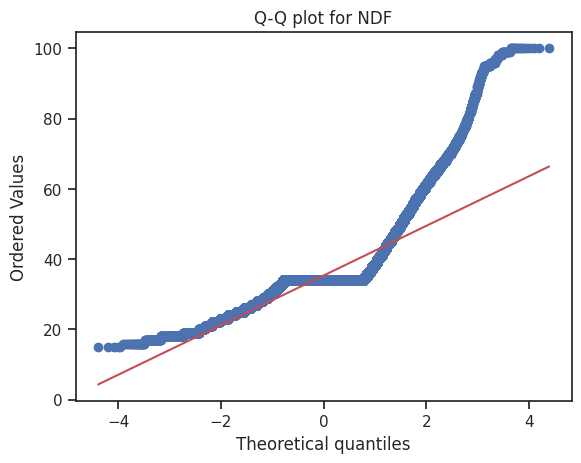

Shapiro-Wilk test for NDF: W=0.7172753378235068, p-value=4.4392434591386255e-148


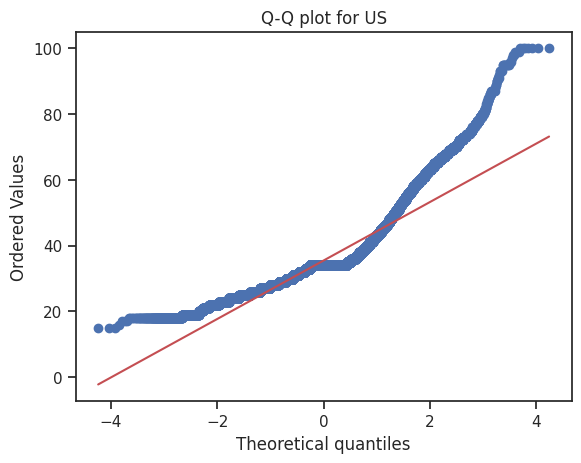

Shapiro-Wilk test for US: W=0.8571449689560113, p-value=2.4503024822473437e-111


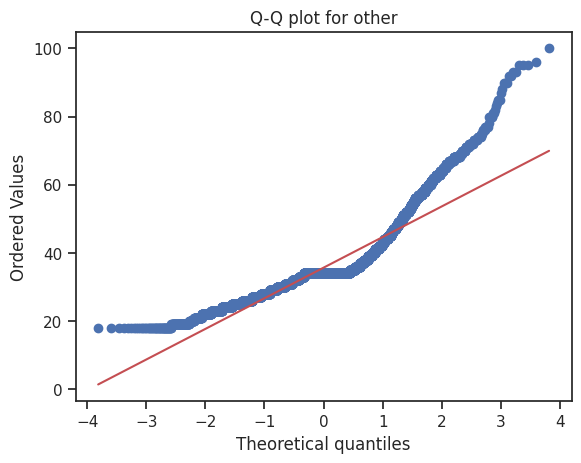

Shapiro-Wilk test for other: W=0.8433479635904622, p-value=1.3602652171783248e-71


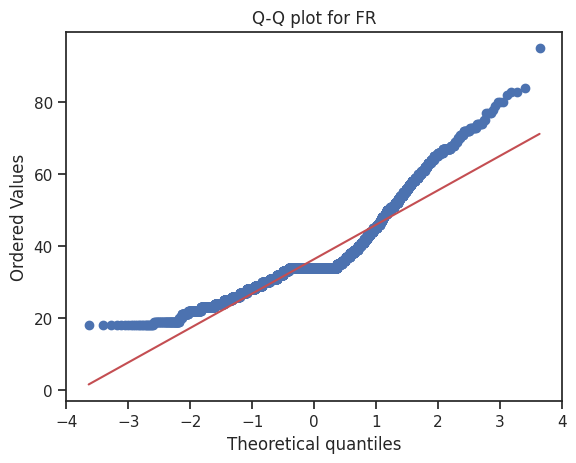

Shapiro-Wilk test for FR: W=0.8695062996504588, p-value=7.007920449749683e-54


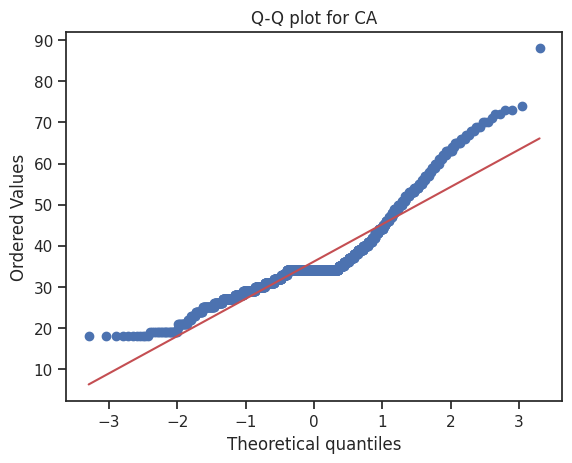

Shapiro-Wilk test for CA: W=0.8772197274214396, p-value=3.963753664146089e-32


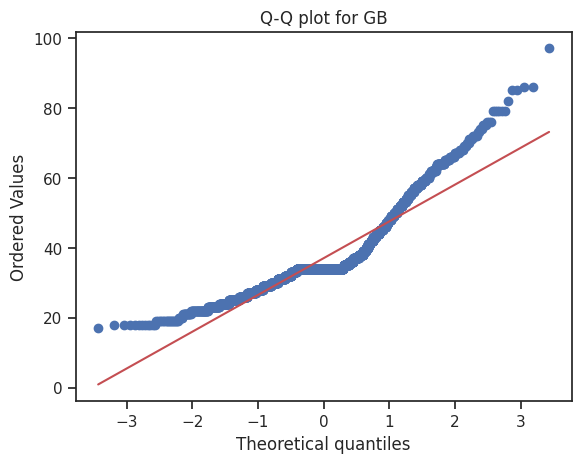

Shapiro-Wilk test for GB: W=0.8719641771113272, p-value=4.653520472256891e-40


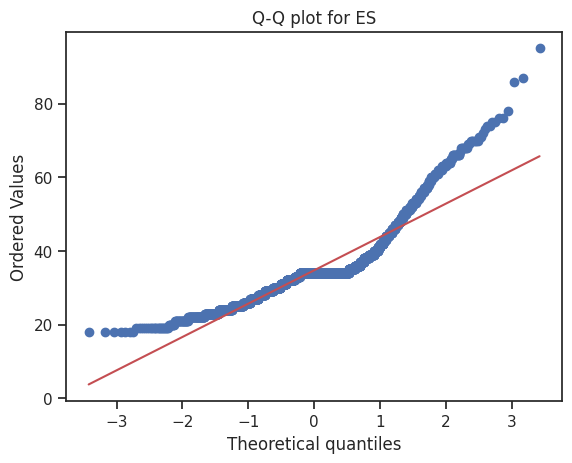

Shapiro-Wilk test for ES: W=0.8565126195350946, p-value=3.232064840122824e-41


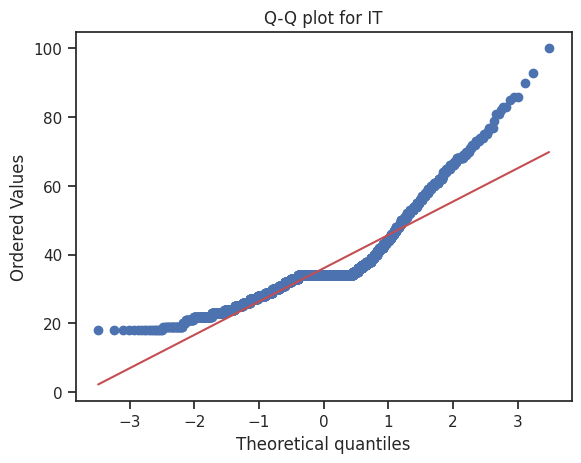

Shapiro-Wilk test for IT: W=0.8430705901758677, p-value=1.5461019405334094e-46


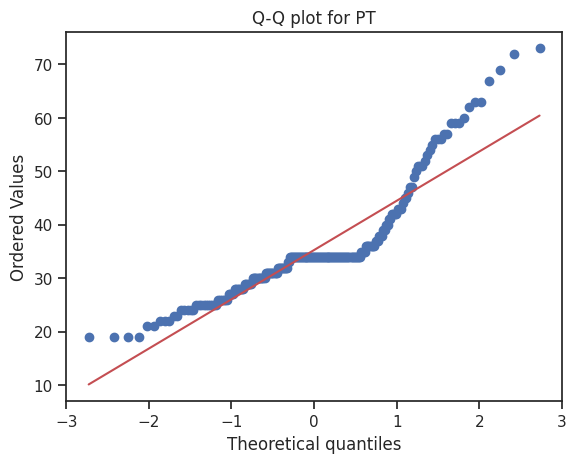

Shapiro-Wilk test for PT: W=0.8416195503363962, p-value=3.9902349016964415e-14


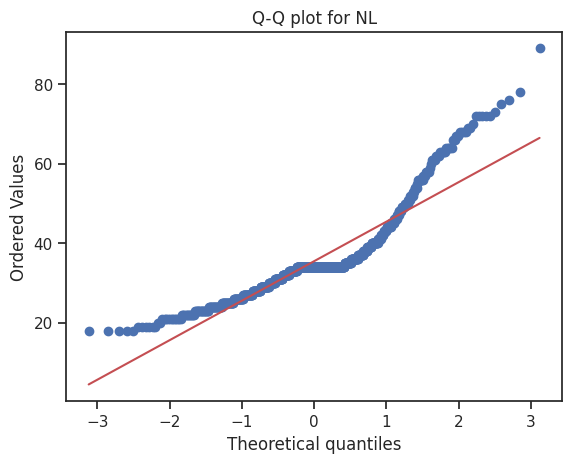

Shapiro-Wilk test for NL: W=0.8553771845130942, p-value=7.694855850664884e-26


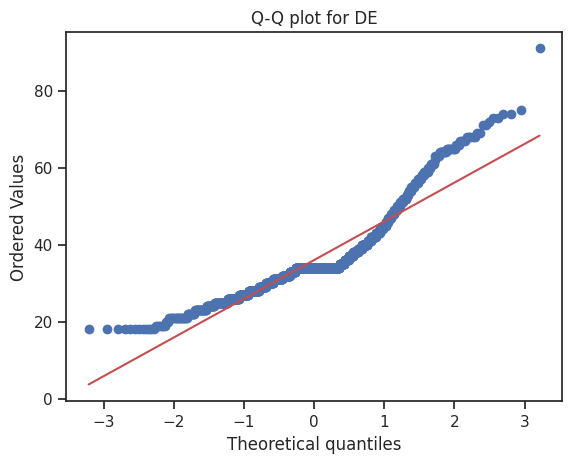

Shapiro-Wilk test for DE: W=0.881306989966093, p-value=1.0318192402983988e-27


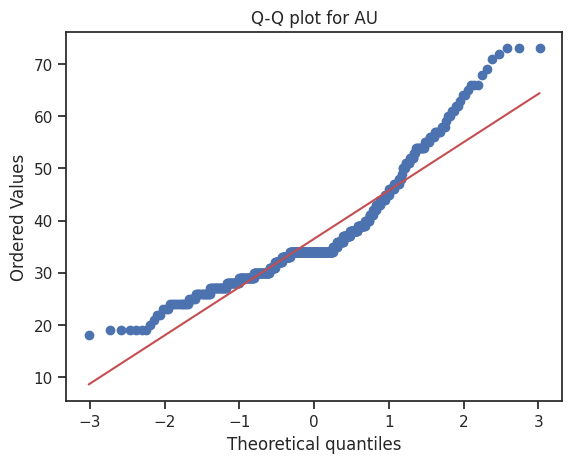

Shapiro-Wilk test for AU: W=0.8871613797323684, p-value=2.0482746079125444e-19


In [68]:
import scipy.stats as stats

# Hypothesis 3 data extraction
df_hypothesis3 = train_df[['age', 'country_destination']].dropna()

# Check for normality using Q-Q plot and Shapiro-Wilk test
for country in df_hypothesis3['country_destination'].unique():
    country_data = df_hypothesis3[df_hypothesis3['country_destination'] == country]['age']
    stats.probplot(country_data, dist="norm", plot=plt)
    plt.title(f'Q-Q plot for {country}')
    plt.show()
    shapiro_test = stats.shapiro(country_data)
    print(f'Shapiro-Wilk test for {country}: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

If we look at the Q-Q plots and the p values from the Shapiro-Wilk test for each of the country we can see that the the data does not follows the normality assumption

In [69]:
# Check for homogeneity of variances using Levene's test
levene_test = stats.levene(*[df_hypothesis3[df_hypothesis3['country_destination'] == country]['age'] for country in df_hypothesis3['country_destination'].unique()])
print(f"Levene's test for homogeneity of variances: W={levene_test.statistic}, p-value={levene_test.pvalue}")

Levene's test for homogeneity of variances: W=371.3611575984834, p-value=0.0


We can see from the Levene's test that the p-values is 0 which is very less than 0.05 which indicates that the variaince significantly differes acorss each destination.

We can see that both the asusmptions of the ANOVA test are not met and hence we'll use the KS test for this hypothesis

In [70]:
# Perform KS test for each pair of destination countries
countries = df_hypothesis3['country_destination'].unique() # Get unique country destinations
ks_test_results = {}

for i, country1 in enumerate(countries):
    for j, country2 in enumerate(countries):
        if i < j:
            data1 = df_hypothesis3[df_hypothesis3['country_destination'] == country1]['age'] # Ages for country1
            data2 = df_hypothesis3[df_hypothesis3['country_destination'] == country2]['age'] # Ages for country2
            ks_test = stats.ks_2samp(data1, data2) #perform KS test
            ks_test_results[f"{country1} vs {country2}"] = (ks_test.statistic, ks_test.pvalue)

# Print KS test results
for pair, result in ks_test_results.items():
    print(f"KS test result for {pair}: D={result[0]}, p-value={result[1]}")

KS test result for NDF vs US: D=0.1828656976858787, p-value=0.0
KS test result for NDF vs other: D=0.15573236445927588, p-value=3.1451592517976935e-198
KS test result for NDF vs FR: D=0.13940139907624116, p-value=2.6088029703180535e-82
KS test result for NDF vs CA: D=0.14487942146178312, p-value=2.5019197835514707e-26
KS test result for NDF vs GB: D=0.16547440644372768, p-value=4.708357545842908e-55
KS test result for NDF vs ES: D=0.19665423511345473, p-value=2.498324188248308e-75
KS test result for NDF vs IT: D=0.13146908129631632, p-value=3.0855074591566876e-42
KS test result for NDF vs PT: D=0.17580595394087975, p-value=2.4515366863298296e-06
KS test result for NDF vs NL: D=0.18953821154392428, p-value=2.7481490162233947e-24
KS test result for NDF vs DE: D=0.17893686234876596, p-value=6.112256017926079e-30
KS test result for NDF vs AU: D=0.18497727878653114, p-value=1.4801232320772381e-16
KS test result for US vs other: D=0.02713333322660283, p-value=5.4536135280690185e-06
KS test r

**Interpretation and Insights**

**General Insights:**

- Most comparisons have significant differences: This suggests that for most pairs of countries, the age distributions of users traveling to those destinations are significantly different.
- Some pairs have no significant differences: For example, US vs. PT, FR vs. CA, and PT vs. NL have p-values greater than 0.05, indicating no significant difference in age distributions.

**Specific Patterns:**

- NDF (Non-Determined/Failed bookings): Shows significant differences with almost all other destinations, indicating that the age distribution for NDF is quite distinct.
- US vs. PT, US vs. NL, US vs. DE: The age distributions between users traveling to these destinations are not significantly different.
- European countries: Comparisons like FR vs. CA and GB vs. AU also show no significant differences, suggesting similar age distributions.

**Hypothesis 4:** The language preference of the user affects the country of the first booking.

- Null Hypothesis (H0): Language preference has no effect on the booking country.
- Alternative Hypothesis (H1): Language preference affects the booking country.

In [71]:
# Create a contingency table
contingency_table_language = pd.crosstab(train_df['language'], train_df['country_destination'])

# Perform chi-square test
chi2_language, p_language, dof_language, expected_language = chi2_contingency(contingency_table_language)

print(f'Chi-square test statistic: {chi2_language}')
print(f'p-value: {p_language}')

Chi-square test statistic: 930.8612868135824
p-value: 3.7163927962787425e-75


**Inference:**
The extremely low p-value (much less than 0.05) indicates a statistically significant association between language preference and booking country. This implies that the preferred language of users has a significant impact on their booking destination.

**Hypothesis 5:** The number of sessions before the first booking is different across different signup methods.

- Null Hypothesis (H0): The number of sessions before the first booking does not differ by signup method.
- Alternative Hypothesis (H1): The number of sessions before the first booking differs by signup method.

In [72]:
# Calculate the number of sessions per user
user_sessions = session_df.groupby('user_id').size().reset_index(name='session_count')

# Merge with train_users
train_users_sessions = pd.merge(train_df, user_sessions, left_on='id', right_on='user_id', how='left')
train_users_sessions['session_count'].fillna(0, inplace=True)

# Group by signup_method
session_groups = [group['session_count'].values for name, group in train_users_sessions.groupby('signup_method')]

In [73]:
# Shapiro-Wilk test for normality on each group
normality_results = {}
for name, group in train_users_sessions.groupby('signup_method'):
    shapiro_stat, shapiro_p_value = stats.shapiro(group['session_count'])
    normality_results[name] = (shapiro_stat, shapiro_p_value)
    print(f'{name} - Shapiro-Wilk test statistic: {shapiro_stat}, p-value: {shapiro_p_value}')

basic - Shapiro-Wilk test statistic: 0.39328187685252136, p-value: 1.1058122247880032e-178
facebook - Shapiro-Wilk test statistic: 0.3328790641925613, p-value: 5.175140188555793e-156
google - Shapiro-Wilk test statistic: 0.5883827866713685, p-value: 5.910554668439678e-34


We can see that the p-values are less than 0.05 which indicates that the data is not normally distrubuted

In [74]:
# Levene's test for homogeneity of variances
levene_stat, levene_p_value = stats.levene(session_groups[0], session_groups[1], session_groups[2])
print(f'Levene test statistic: {levene_stat}')
print(f'Levene p-value: {levene_p_value}')

Levene test statistic: 375.78739041744313
Levene p-value: 1.2141277906280579e-163


The p-value is less than 0.05 which indicates that the varaition across the groups are not equal

Since the assmptions of ANOVA are not met we'll be proceeding with KS test

In [75]:
kruskal_stat, kruskal_p_value = stats.kruskal(session_groups[0], session_groups[1], session_groups[2])
print(f'Kruskal-Wallis H-statistic: {kruskal_stat}')
print(f'Kruskal-Wallis p-value: {kruskal_p_value}')

Kruskal-Wallis H-statistic: 2037.3192493698414
Kruskal-Wallis p-value: 0.0


The Kruskal-Wallis test results indicate that the number of sessions before the first booking differs significantly across different signup methods.

**Summary**
For all four hypotheses, the test results show highly significant p-values, indicating strong evidence that the variables tested are associated with one another. Specifically:

- The signup method affects the booking rate and possibly the destination.
- The device type used impacts the booking destination.
- Most pairs of countries, the age distributions of users traveling to those destinations are significantly different and some pairs have no significant differences.
- Language preference is associated with the booking country.
- Number of sessions before the first booking differs significantly across different signup methods.